In [8]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
import gensim
from gensim import corpora, models
from collections import Counter
import scipy.io
import matplotlib.pyplot as plt
from random import *
import random
import scipy.io
from pathlib import Path
from scipy.stats import spearmanr
import plotpatterns as plotpatterns
import helper as helper
import math
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy import stats

# HoweKahana 1999 Dataset

There are 65 subjects in total, each completing 6 sessions of 16 lists.
They add up to a total of 660 trials of free recall.
There are 10.276923076923078 trials on average per person.
With 3.2463361232090664 as the standard deviation.
There are 62 subjects in total, each completing 6 sessions of 16 lists.
They add up to a total of 701 trials of free recall.
There are 11.306451612903226 trials on average per person.
With 2.6248730210604374 as the standard deviation.


/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


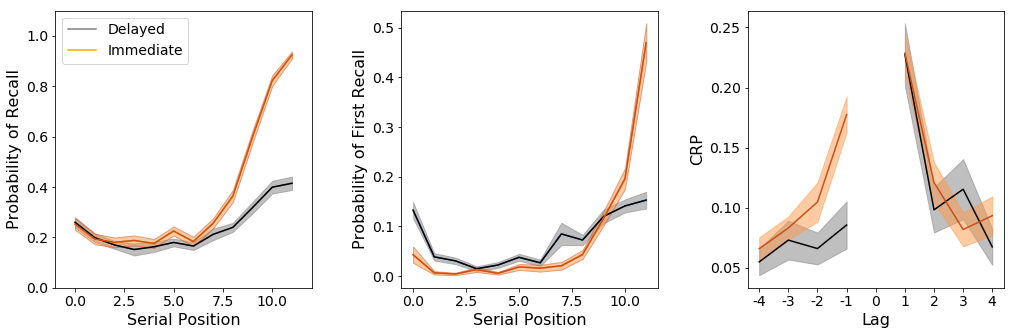

Statistics=1188.000, p=0.020
Different distribution (reject H0)
Ttest_indResult(statistic=1.9515075446572918, pvalue=0.053562618817301566)
Statistics=185.500, p=0.042
Different distribution (reject H0)
Ttest_indResult(statistic=0.0038705285754970986, pvalue=0.9969263048105588)
Statistics=882.500, p=0.000
Different distribution (reject H0)
Ttest_indResult(statistic=-3.7570642402214527, pvalue=0.00027795769947150156)


In [2]:
# load dataset
ll = 12
percent = 80
recall_sp_d, subject_d = helper.extractData_HowaKaha("../HowaKaha99/Delay.dat")
spcs_d, pfrs_d, crps_d, accs_d, tces, nums, recalls_sp_d_good, recalls_sp_d_bad = helper.extractTrials_HoweKaha(recall_sp_d,np.unique(subject_d),subject_d,percent,1,ll)
counts, bins = np.histogram(subject_d,[i for i in range(1000)])
counts = [x for x in counts if x>0]
print("There are {} subjects in total, each completing 6 sessions of 16 lists.".format(len(np.unique(subject_d))))
print("They add up to a total of {} trials of free recall.".format(len(recall_sp_d)))
print("There are {} trials on average per person.".format(np.mean(counts)))
print("With {} as the standard deviation.".format(np.std(counts)))


recall_sp_i, subject_i = helper.extractData_HowaKaha("../HowaKaha99/Immed.dat")
spcs_i, pfrs_i, crps_i, accs_i, tces, nums, recalls_sp_i_good, recalls_sp_i_bad = helper.extractTrials_HoweKaha(recall_sp_i,np.unique(subject_i),subject_i,percent,1,ll)
counts, bins = np.histogram(subject_i,[i for i in range(1000)])
counts = [x for x in counts if x>0]
print("There are {} subjects in total, each completing 6 sessions of 16 lists.".format(len(np.unique(subject_i))))
print("They add up to a total of {} trials of free recall.".format(len(recall_sp_i)))
print("There are {} trials on average per person.".format(np.mean(counts)))
print("With {} as the standard deviation.".format(np.std(counts)))

spc_d, pfr_d = helper.get_spc_pfr(recall_sp_d,ll)
crp_d,_ = helper.get_crp(recall_sp_d,4,ll,1)
spc_i, pfr_i = helper.get_spc_pfr(recall_sp_i,ll)
crp_i,_ = helper.get_crp(recall_sp_i,4,ll,1)

#plotpatterns.plot_behav(spc_d,pfr_d,crp_d,spc_i,pfr_i,crp_i,ll,'Delayed','Immediate','figure_delay_immed.png')
forward1,forward2,lag1,lag2,contiguity1,contiguity2,primacy1,primacy2 = plotpatterns.plot_behav0(12,spcs_d[0],pfrs_d[0],crps_d[0],spcs_i[0],pfrs_i[0],crps_i[0],'Delayed','Immediate','figure_delay_immed.png')
#forward1,forward2,contiguity1,contiguity2 = helper.obtain_CRPbehav(crps_d[0],crps_i[0])
helper.stats_test(forward1,forward2)
helper.stats_test(primacy1,primacy2)

helper.stats_test(contiguity1,contiguity2)


In [58]:
# non-parametric test, difference of good/bad in -1 is larger in immediate condition
temp1 = [x[3] for i,x in enumerate(crps_d[1])]
temp2 = [x[3] for i,x in enumerate(crps_d[2])]
diff1 = [np.random.choice(temp1, 10000)-np.random.choice(temp2, 10000)]
temp3 = [x[3] for i,x in enumerate(crps_i[1])]
temp4 = [x[3] for i,x in enumerate(crps_i[2])]
diff2 = [np.random.choice(temp3, 10000)-np.random.choice(temp4, 10000)]
stat, p = mannwhitneyu(list(diff1),list(diff2))
print(np.mean(diff1))
print(np.mean(diff2))
print('Statistics=%.3f, p=%.3f' % (stat, p))

# non-parametric test, difference of good/bad in +1 is larger in delay condition
temp1 = [x[5] for i,x in enumerate(crps_d[1])]
temp2 = [x[5] for i,x in enumerate(crps_d[2])]
diff1 = [np.random.choice(temp1, 10000)-np.random.choice(temp2, 10000)]
temp3 = [x[5] for i,x in enumerate(crps_i[1])]
temp4 = [x[5] for i,x in enumerate(crps_i[2])]
diff2 = [np.random.choice(temp3, 10000)-np.random.choice(temp4, 10000)]
stat, p = mannwhitneyu(list(diff1),list(diff2))
print(np.mean(diff1))
print(np.mean(diff2))
print('Statistics=%.3f, p=%.3f' % (stat, p))

0.006772070155334863
0.06601345542443453
Statistics=-14207.000, p=0.000
0.12300601812921377
0.03942469323816507
Statistics=-2657.500, p=0.000


/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


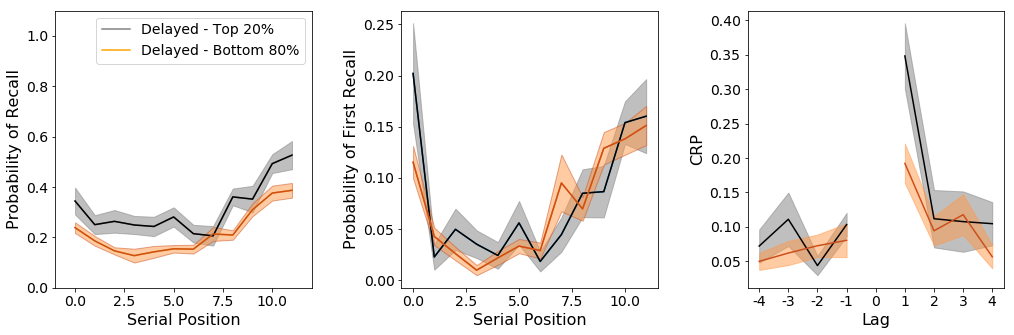

12
41
Statistics=198.500, p=0.159
Same distribution (fail to reject H0)
Ttest_indResult(statistic=1.0291891748317863, pvalue=0.3082472622009589)
Statistics=187.500, p=0.007
Different distribution (reject H0)
Ttest_indResult(statistic=1.386850671378716, pvalue=0.17037495885923248)


In [32]:
spc_d, pfr_d = helper.get_spc_pfr(recalls_sp_d_good,ll)
crp_d,_ = helper.get_crp(recalls_sp_d_good,4,ll,1)
spc_i, pfr_i = helper.get_spc_pfr(recalls_sp_d_bad,ll)
crp_i,_ = helper.get_crp(recalls_sp_d_bad,4,ll,1)
#plotpatterns.plot_behav(spc_d,pfr_d,crp_d,spc_i,pfr_i,crp_i,ll,"Delayed - Top Half", "Delayed - Bottom Half",'figure_delay.png') 

forward1_d,forward2_d,lag1,lag2,contiguity1_d,contiguity2_d,_,_ = plotpatterns.plot_behav0(12,spcs_d[1], pfrs_d[1], crps_d[1], spcs_d[2], pfrs_d[2], crps_d[2], "Delayed - Top 20%", "Delayed - Bottom 80%", "figure_delay.png")
print(len(forward1_d))
print(len(forward2_d))
#helper.stats_test(contiguity1_d,contiguity2_d)
helper.stats_test(forward1_d,forward2_d)
helper.stats_test(lag1,lag2)

/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


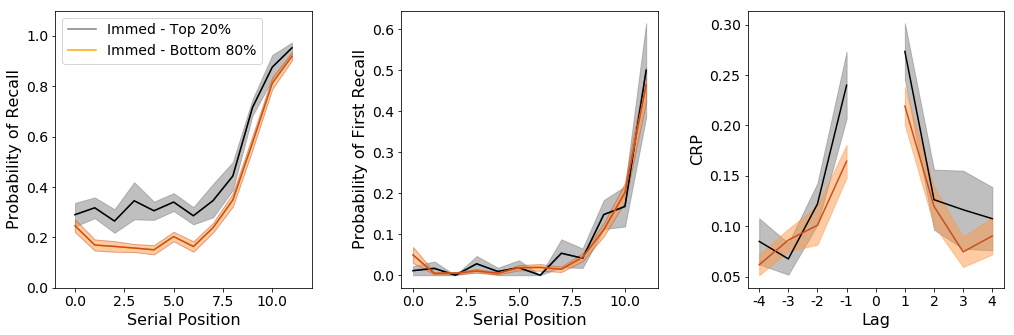

Statistics=144.000, p=0.025
Different distribution (reject H0)
Ttest_indResult(statistic=1.469411176379207, pvalue=0.1473171625003604)
10
48


In [33]:
spc_d, pfr_d = helper.get_spc_pfr(recalls_sp_i_good,ll)
crp_d,_ = helper.get_crp(recalls_sp_i_good,4,ll,1)
spc_i, pfr_i = helper.get_spc_pfr(recalls_sp_i_bad,ll)
crp_i,_ = helper.get_crp(recalls_sp_i_bad,4,ll,1)
#plotpatterns.plot_behav(spc_d,pfr_d,crp_d,spc_i,pfr_i,crp_i,ll,"Immed - Top Half", "Immed - Bottom Half",'figure_immed.png') 

forward1_i,forward2_i,lag1,lag2,contiguity1_i,contiguity2_i,_,_ = plotpatterns.plot_behav0(12,spcs_i[1], pfrs_i[1], crps_i[1], spcs_i[2], pfrs_i[2], crps_i[2], "Immed - Top 20%", "Immed - Bottom 80%",'figure_immed.png')
#forward1,forward2,contiguity1,contiguity2 = helper.obtain_CRPbehav(crps_i[1],crps_i[2])
helper.stats_test(contiguity1_i,contiguity2_i)
#helper.stats_test(forward1_i,forward2_i)
print(len(contiguity1_i))
print(len(contiguity2_i))

# PEERS dataset

In [2]:
# load PEERS data
recalls, recalls_sp, listlengths, sessionlengths, subjects, subjs = helper.load_data()
print("PEERS session 1 data loaded")

PEERS session 1 data loaded


In [3]:
# parameter
percent = 90 # percentage used to separate data
spcs,pfrs,crps,accs,tces,nums, recalls_sp_good, recalls_sp_bad,included_subjects, transitions_good, transitions_bad, RT_good, RT_bad = helper.extractTrials(recalls, recalls_sp,subjects,subjs,sessionlengths,percent,2,5)
print("There are {} subjects in total, each completing 6 sessions of 16 lists.".format(len(spcs[0])))
print("They add up to a total of {} trials of free recall.".format(len(spcs[0])*96))
#plotpatterns.plot_behav2(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "")
#plotpatterns.plot_behav2(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", "")

/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/people/qiongz/.conda/envs/myenv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


There are 171 subjects in total, each completing 6 sessions of 16 lists.
They add up to a total of 16416 trials of free recall.


#### Result 1: Better subjects have higher primacy and forward asymmetry

In [4]:
print("There are {} good subjects.".format(len(spcs[1])))
print("In total {} trials.".format(np.sum(nums[1])))
print("Mean performance for good subjects is {}.".format(np.mean(accs[1])/16))
print("There are {} bad subjects.".format(len(spcs[2])))
print("In total {} trials.".format(np.sum(nums[2])))
print("Mean performance for bad subjects is {}.".format(np.mean(accs[2])/16))

There are 17 good subjects.
In total 1632 trials.
Mean performance for good subjects is 0.845358455882353.
There are 154 bad subjects.
In total 14784 trials.
Mean performance for bad subjects is 0.596586681547619.


SpearmanrResult(correlation=0.2499774998594164, pvalue=0.0009757949150140907)


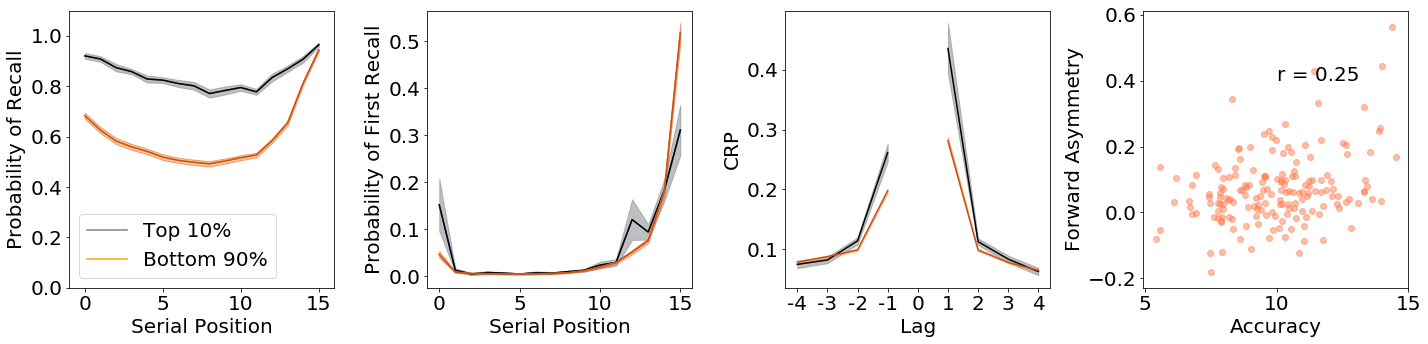

In [5]:
plotpatterns.plot_behav1(16, spcs[1], pfrs[1], crps[1], spcs[2], pfrs[2], crps[2], "Top 10%","Bottom 90%",spcs[0], pfrs[0],crps[0],accs[0], "figure7_PEERS1_2.png")

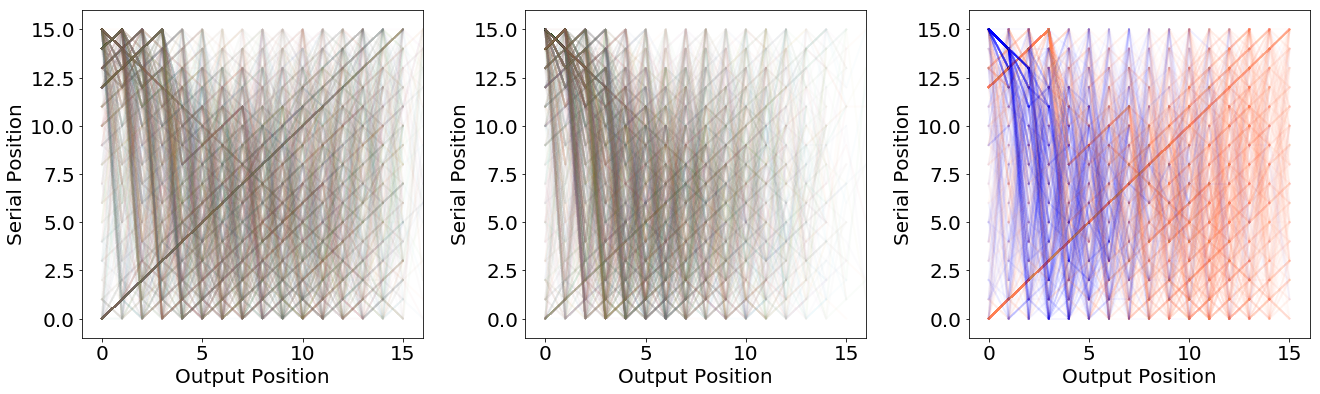

In [5]:
plotpatterns.plot_behav4(recalls_sp_good,recalls_sp_bad,"figure7_PEERS2_2.png")

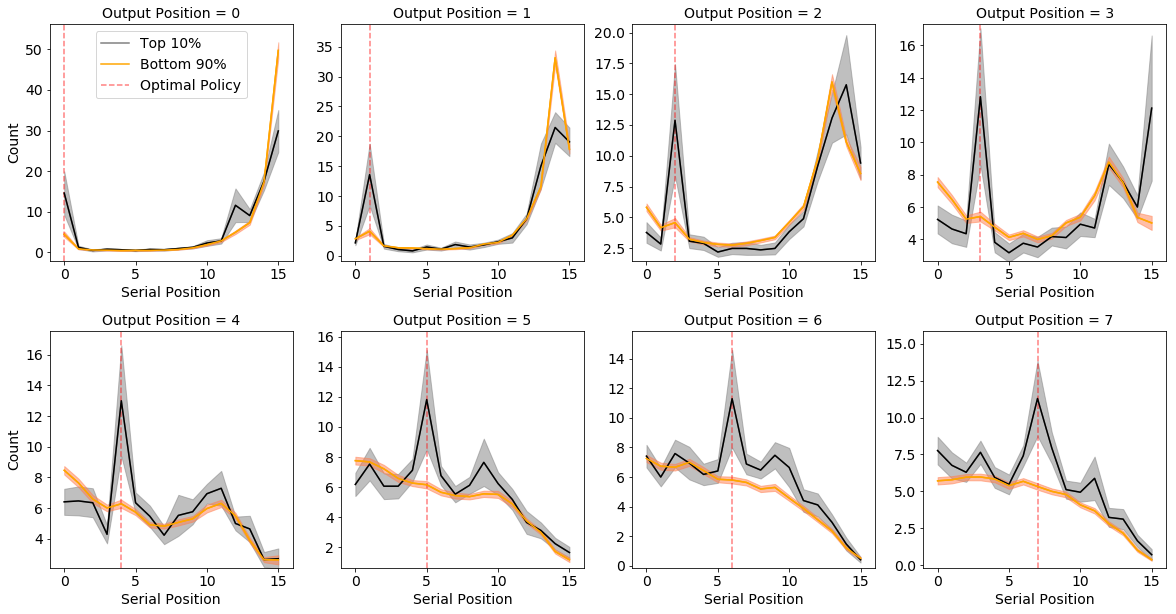

In [4]:
plotpatterns.plot_transitions(transitions_good,transitions_bad,'figure7_transitions.png')

#### Result 2: Better subjects have higher forward asymmetry on primacy trials and higher backward transitions in recency trials

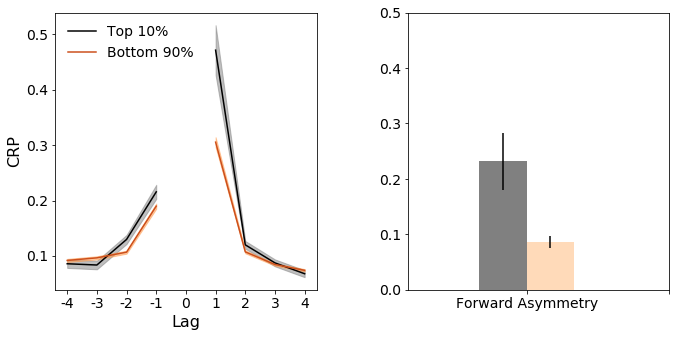

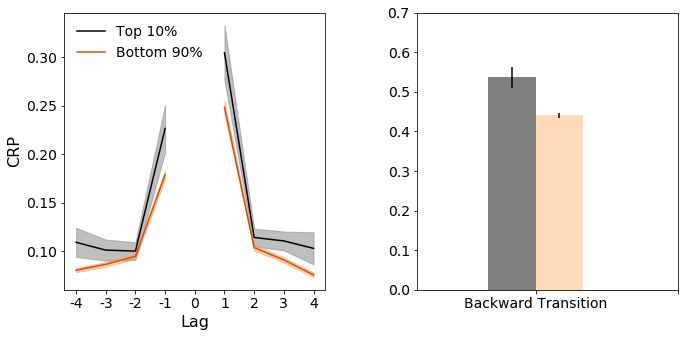

In [4]:
plotpatterns.plot_behav2_forward(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "Figure8_top.png")
plotpatterns.plot_behav2_contiguity(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", "Figure8_bottom.png")

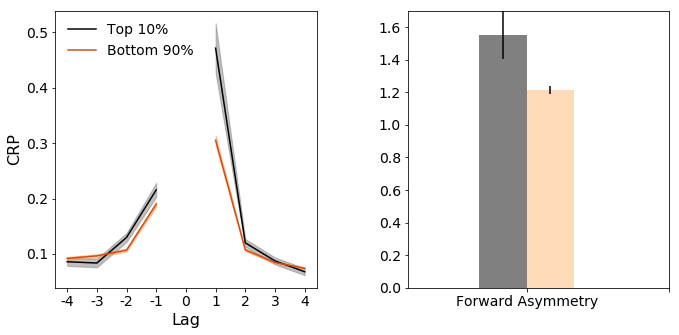

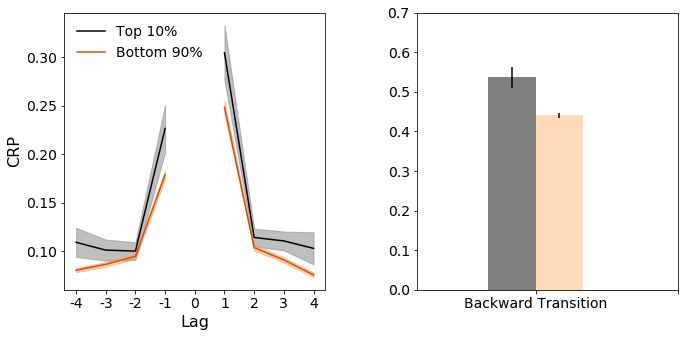

In [6]:
plotpatterns.plot_behav2_forward(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "Figure8_top_ratio.png")
plotpatterns.plot_behav2_contiguity(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", "Figure8_bottom_ratio.png")

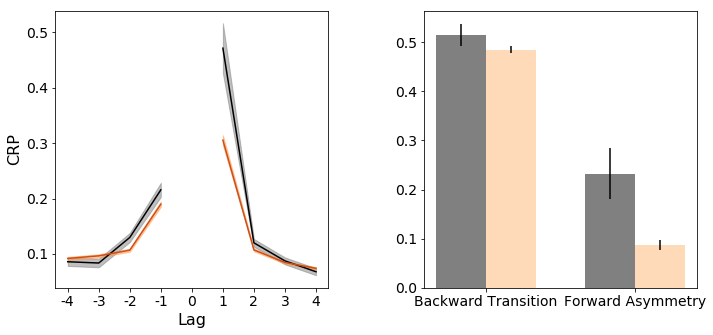

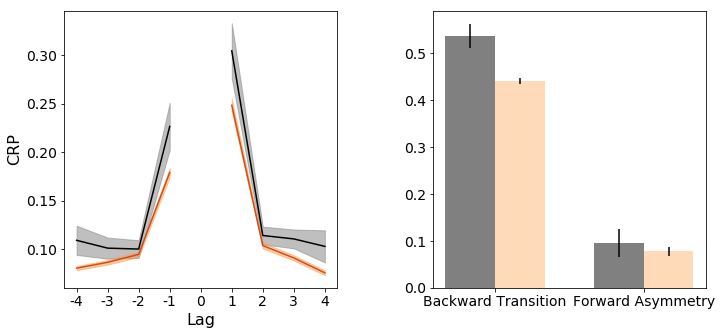

In [12]:
plotpatterns.plot_behav2(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", 0, "Figure8_top_R.png")
plotpatterns.plot_behav2(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", 0,"Figure8_bottom_R.png")

This is when forward asymmetry is calculated using ratio rather than subtraction with +1/+2/+3/+4 lags, and -1/-2/-3/-4 lags - suggested by Reviewer 1.

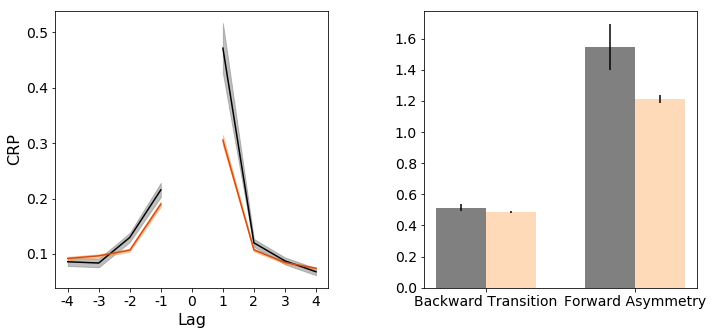

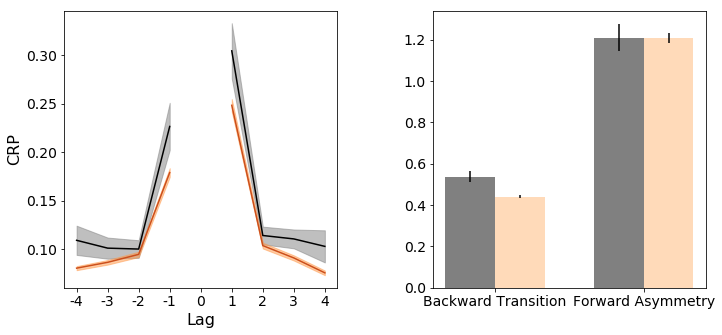

In [15]:
plotpatterns.plot_behav2(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", 1, "Figure8_top_ratio_R.png")
plotpatterns.plot_behav2(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", 1,"Figure8_bottom_ratio_R.png")

### Stats

In [15]:
print('Test difference for serial position curve (pos=0)')
helper.stats_test([x[0] for x in pfrs[1]],[x[0] for x in pfrs[2]])

Test difference for serial position curve (pos=0)
Statistics=940.000, p=0.027
Different distribution (reject H0)
Ttest_indResult(statistic=3.8323017132539174, pvalue=0.00017879264493349484)


In [16]:
print('Test difference for serial position curve (pos=15)')
helper.stats_test([x[-1] for x in pfrs[1]],[x[-1] for x in pfrs[2]])

Test difference for serial position curve (pos=15)
Statistics=719.500, p=0.001
Different distribution (reject H0)
Ttest_indResult(statistic=-3.1407766378829955, pvalue=0.0019895735947309664)


In [24]:
print('Test difference in recency trials for forward asymmetry')
data1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps[7]]
data2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps[8]]
helper.stats_test(data1,data2)

print('Test difference in primacy trials for forward asymmetry')
data1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps[4]]
data2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps[5]]
helper.stats_test(data1,data2)

Test difference in recency trials for forward asymmetry
Statistics=1235.000, p=0.352
Same distribution (fail to reject H0)
Ttest_indResult(statistic=0.5766602032103568, pvalue=0.5649363000760463)
Test difference in primacy trials for forward asymmetry
Statistics=807.000, p=0.005
Different distribution (reject H0)
Ttest_indResult(statistic=4.1128352478048456, pvalue=6.090868274340561e-05)


In [27]:
print('Test difference in recency trials for contiguity')
data1 = [np.sum(x[0:4]) for x in crps[7]]
data2 = [np.sum(x[0:4]) for x in crps[8]]
helper.stats_test(data1,data2)

print('Test difference in primacy trials for contiguity')
data3 = [np.sum(x[0:4]) for x in crps[4]]
data4 = [np.sum(x[0:4]) for x in crps[5]]
helper.stats_test(data3,data4)

Test difference in recency trials for contiguity
Statistics=641.000, p=0.000
Different distribution (reject H0)
Ttest_indResult(statistic=4.540218193715213, pvalue=1.0638415654207444e-05)
Test difference in primacy trials for contiguity
Statistics=986.000, p=0.048
Different distribution (reject H0)
Ttest_indResult(statistic=1.3255970122361092, pvalue=0.18676231928838824)


In [5]:
print('Test difference in top 10 for forward asymmetry')
data1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps[7]] # top 10% recent
data2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps[4]] # top 10% primacy
helper.stats_test(data1,data2)

print('Test difference in bottom 90 for forward asymmetry')
data1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps[8]] # bottom 90% recent
data2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps[5]] # bottom 90% primacy
helper.stats_test(data1,data2)

Test difference in top 10 for forward asymmetry
Statistics=90.000, p=0.031
Different distribution (reject H0)
Ttest_indResult(statistic=-2.285259711921381, pvalue=0.029068228537666753)
Test difference in bottom 90 for forward asymmetry
Statistics=11464.000, p=0.307
Same distribution (fail to reject H0)
Ttest_indResult(statistic=-0.5944283120136483, pvalue=0.5526649124508098)


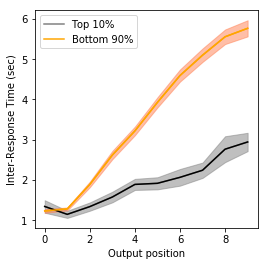

In [36]:
plt.rcParams['figure.figsize'] = (4, 4)
LL=16
data=RT_good
y = np.mean(data.T,0)
error = np.std(data.T,0)/np.sqrt(RT_good.shape[1]-1)
plt.plot(y,'grey')


data=RT_bad
y2 = np.mean(data.T,0)
error2 = np.std(data.T,0)/np.sqrt(RT_bad.shape[1]-1)
plt.plot(y2,'orange')

bottom, top = plt.ylim() 


plt.legend(['Top 10%','Bottom 90%'],loc='upper left')

plt.plot(range(10), y, color='k')
plt.fill_between(range(10), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

plt.plot(range(10), y2, color='orange')
plt.fill_between(range(10), y2-error2, y2+error2,alpha=0.5, edgecolor='coral', facecolor='coral')
plt.ylabel('Inter-Response Time (sec)')
plt.xlabel('Output position')

plt.savefig('./Figs/Reviewer2_IRT.png') 
plt.show()


In [10]:
prob = [np.sum(x[0:4]) for x in pfrs[0]]
print("On {} proportion of trials, first recall is at serial position 1 to 4.".format(np.mean(prob)))

On 0.07797270955165692 proportion of trials, first recall is at serial position 1 to 4.


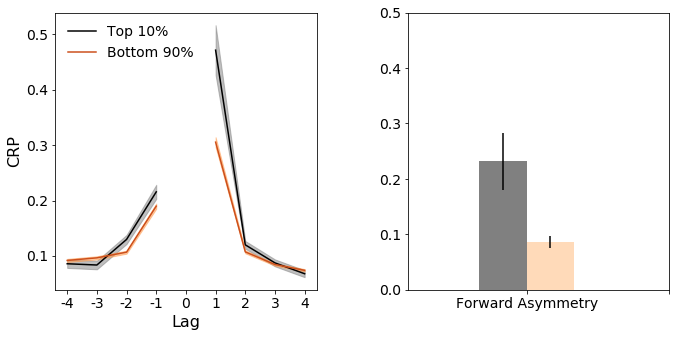

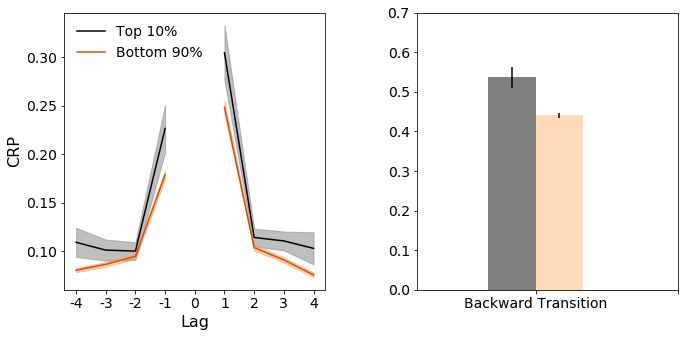

In [5]:
plotpatterns.plot_behav2_forward(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "Figure8_top.png")
plotpatterns.plot_behav2_contiguity(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", "Figure8_bottom.png")

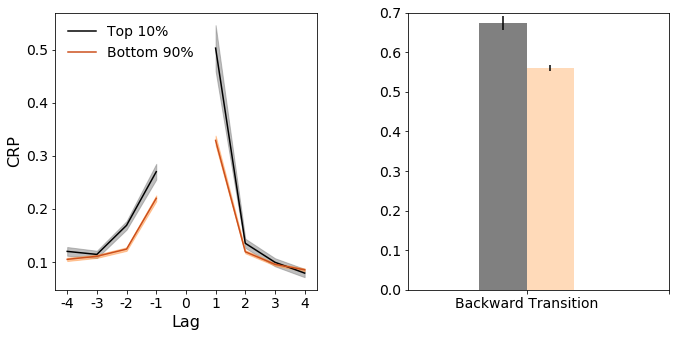

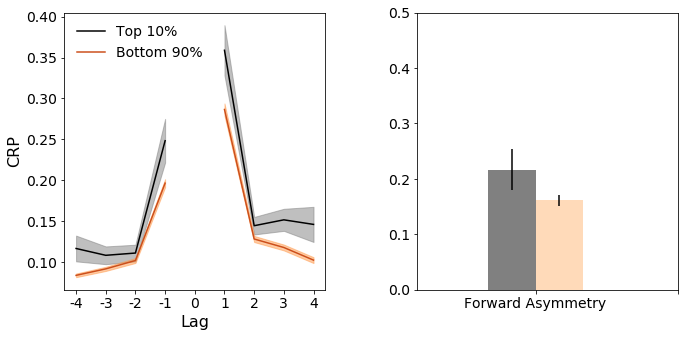

In [12]:
plotpatterns.plot_behav2_contiguity(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "")
plotpatterns.plot_behav2_forward(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", "")

SpearmanrResult(correlation=0.599225985299006, pvalue=4.794410360677927e-18)


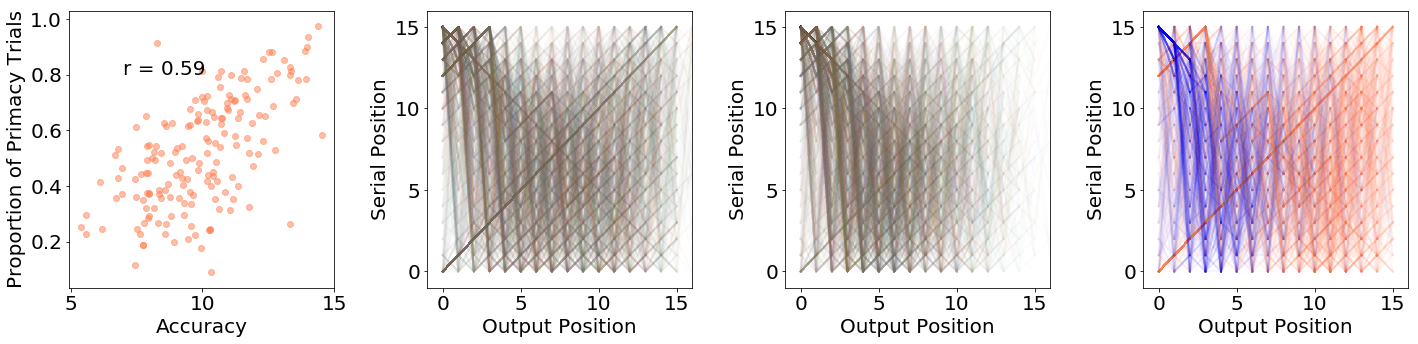

In [6]:
plotpatterns.plot_behav5(accs,nums,recalls_sp_good,recalls_sp_bad,"figure7_PEERS2_3.png")

## Stats|

In [7]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy import stats
# seed the random number generator
seed(1)
# non-parametric
stat, p = mannwhitneyu([x[0] for x in pfrs[1]], [x[0] for x in pfrs[2]])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
# indpendent t-test
stats.ttest_ind([x[0] for x in pfrs[1]], [x[0] for x in pfrs[2]])    


Statistics=940.000, p=0.027
Different distribution (reject H0)


Ttest_indResult(statistic=3.8323017132539174, pvalue=0.00017879264493349484)

In [8]:
seed(1)
# non-parametric
stat, p = mannwhitneyu([x[-1] for x in pfrs[1]], [x[-1] for x in pfrs[2]])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
# indpendent t-test
stats.ttest_ind([x[-1] for x in pfrs[1]], [x[-1] for x in pfrs[2]])    


Statistics=719.500, p=0.001
Different distribution (reject H0)


Ttest_indResult(statistic=-3.1407766378829955, pvalue=0.0019895735947309664)

In [16]:
np.percentile([x[0] for x in pfrs[1]],50)
#np.mean([x[0] for x in pfrs[1]])

0.0625

SpearmanrResult(correlation=0.2499774998594164, pvalue=0.0009757949150140907)


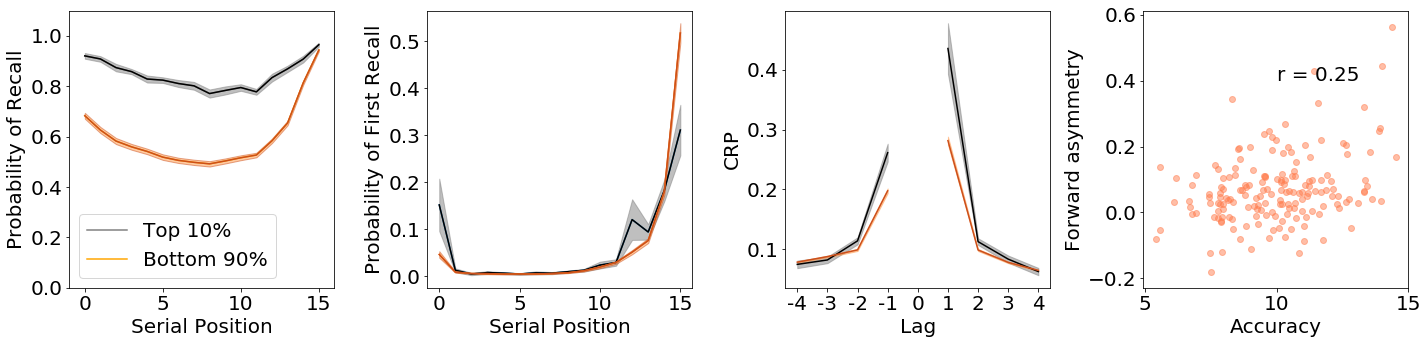

In [5]:
plotpatterns.plot_behav1(spcs[1], pfrs[1], crps[1], spcs[2], pfrs[2], crps[2], "Top 10%","Bottom 90%",spcs[0], pfrs[0],crps[0],accs[0], "figure7_PEERS1.png")

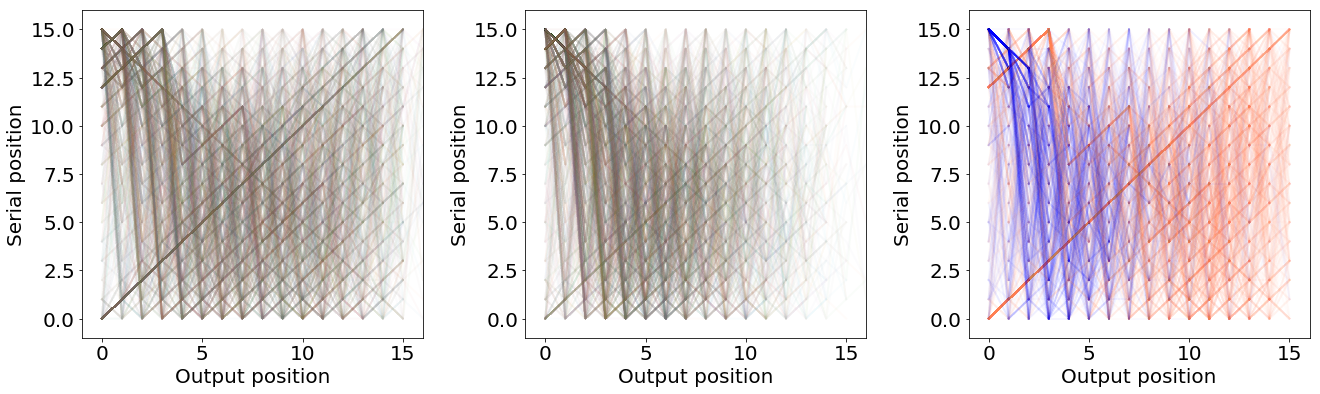

In [6]:
plotpatterns.plot_behav4(recalls_sp_good,recalls_sp_bad,"figure7_PEERS2.png")

#### Result 2: 

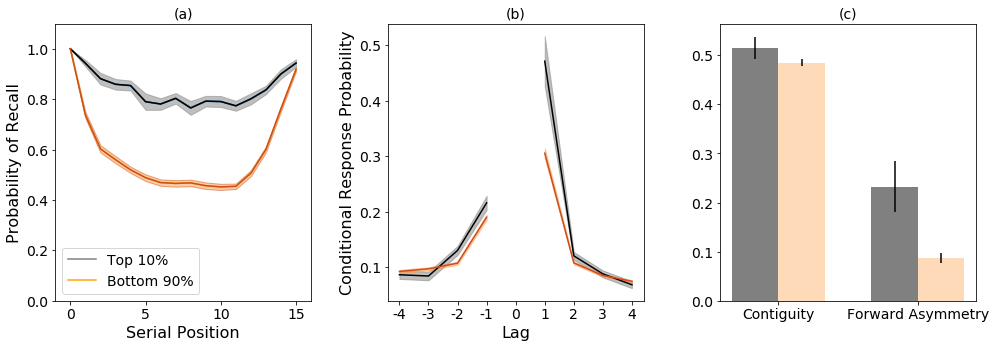

In [4]:
plotpatterns.plot_behav2(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "")


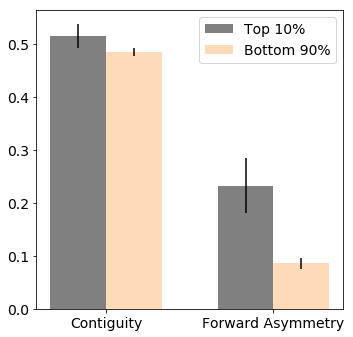

In [34]:
   
    
def plot_behav2(spc1, pfr1, crp1, spc2, pfr2, crp2, label1, label2, filename):

    left = 0.125  # the left side of the subplots of the figure
    right = 0.9   # the right side of the subplots of the figure
    bottom = 0.2  # the bottom of the subplots of the figure
    top = 0.9     # the top of the subplots of the figure
    wspace = 0.3  # the amount of width reserved for space between subplots,
                 # expressed as a fraction of the average axis width
    hspace = 0.5  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 16 
    LL = 16
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
    
    plt.rcParams['figure.figsize'] = (16.5,5.5)
    plt.subplot(1,3,1)
    plt.title('(a)')
    plt.plot(np.mean(spc1,0),'grey')
    
    data=np.asarray(spc1)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(spc1)-1)
    
    data=np.asarray(spc2)
    y2 = np.mean(data,0)
    error2 = np.std(data,0)/np.sqrt(len(spc2)-1)
    plt.plot(y2,'orange')
    plt.legend([label1,label2])
    
    plt.plot(y)
    plt.plot(range(LL), y, color='k')
    plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

    plt.plot(range(LL), y2, 'k', color='#CC4F1B')
    plt.fill_between(range(LL), y2-error2, y2+error2,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
    #plt.title('Serial position curve')
    plt.ylabel('Probability of Recall')
    plt.xlabel('Serial Position')
    plt.axis([-1,16,0,1.1])

    plt.subplot(1,3,2)
    plt.title('(b)')
    temp = [x[0:4] for x in crp1]
    data=np.asarray(temp)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(crp1)-1)
    plt.plot(range(4), y, color='k')
    plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

    temp = [x[5:9] for x in crp1]
    data=np.asarray(temp)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(crp1)-1)
    #plt.plot(y)
    plt.plot([5,6,7,8], y, color='k')
    plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

    temp = [x[0:4] for x in crp2]
    data=np.asarray(temp)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(crp2)-1)
    plt.plot(range(4), y, color='#CC4F1B')
    plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

    temp = [x[5:9] for x in crp2]
    data=np.asarray(temp)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(crp2)-1)
    plt.plot([5,6,7,8], y, color='#CC4F1B')
    plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

    plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
    plt.ylabel('Conditional Response Probability')
    plt.xlabel('Lag')


    plt.subplot(1,3,3)
    plt.title('(c)')

    temp = [np.sum(np.subtract(x[5:9],np.flip(x[0:4]))) for x in crp1]
    data=np.asarray(temp)
    y1 = np.mean(data,0)
    error1 = np.std(data,0)/np.sqrt(len(crp1)-1)
    #plt.plot(y)
    plt.plot([5,6,7,8], y, color='k')
    plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')


    temp = [np.sum(np.subtract(x[5:9]),np.flip(x[0:4])) for x in crp2]
    data=np.asarray(temp)
    y2 = np.mean(data,0)
    error2 = np.std(data,0)/np.sqrt(len(crp2)-1)
    
    plt.bar([0,1], [y1,y2], color='#CC4F1B')
    plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

    #plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
    plt.ylabel('Corrected CRP')
    plt.xlabel('Lag')


    plt.subplots_adjust(left, bottom, right, top, wspace, hspace) 
    
    if filename:
        plt.savefig('./Figs/'+filename) 
    plt.show()    
    
    
    
#plot_behav2(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "")
plt.rcParams['figure.figsize'] = (5.5,5.5)
crp1 = crps[4]
crp2 = crps[5]

temp = [np.sum(np.subtract(x[5:9],np.flip(x[0:4]))) for x in crp1]
data=np.asarray(temp)
y1 = np.mean(data,0)
error1 = np.std(data,0)/np.sqrt(len(crp1)-1)
temp = [np.sum(np.subtract(x[5:9],np.flip(x[0:4]))) for x in crp2]
data=np.asarray(temp)
y2 = np.mean(data,0)
error2 = np.std(data,0)/np.sqrt(len(crp2)-1)

temp = [np.sum(x[0:4]) for x in crp1]
data=np.asarray(temp)
y1c = np.mean(data,0)
error1c = np.std(data,0)/np.sqrt(len(crp1)-1)
temp = [np.sum(x[0:4]) for x in crp2]
data=np.asarray(temp)
y2c = np.mean(data,0)
error2c = np.std(data,0)/np.sqrt(len(crp2)-1)


plt.bar([1,4], [y1c,y1], width=1, yerr=[error1c,error1], color='grey')
plt.bar([2,5], [y2c,y2], width=1, yerr=[error2c,error2], color='peachpuff')
plt.legend(['Top 10%','Bottom 90%'])
plt.xticks([1.5,4.5], ('Contiguity','Forward Asymmetry'))
#plt.ylabel('Forward Asymmetry')
plt.show()

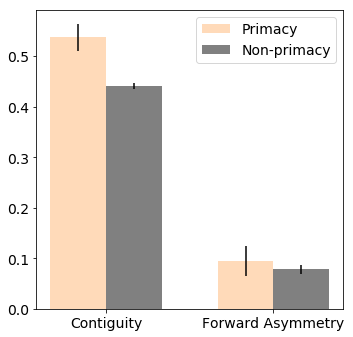

In [31]:
#plot_behav2(spcs[4], pfrs[4], crps[4], spcs[5], pfrs[5], crps[5], "Top 10%","Bottom 90%", "")
plt.rcParams['figure.figsize'] = (5.5,5.5)
crp1 = crps[7]
crp2 = crps[8]

temp = [np.sum(np.subtract(x[5:9],np.flip(x[0:4]))) for x in crp1]
data=np.asarray(temp)
y1 = np.mean(data,0)
error1 = np.std(data,0)/np.sqrt(len(crp1)-1)
temp = [np.sum(np.subtract(x[5:9],np.flip(x[0:4]))) for x in crp2]
data=np.asarray(temp)
y2 = np.mean(data,0)
error2 = np.std(data,0)/np.sqrt(len(crp2)-1)

temp = [np.sum(x[0:4]) for x in crp1]
data=np.asarray(temp)
y1c = np.mean(data,0)
error1c = np.std(data,0)/np.sqrt(len(crp1)-1)
temp = [np.sum(x[0:4]) for x in crp2]
data=np.asarray(temp)
y2c = np.mean(data,0)
error2c = np.std(data,0)/np.sqrt(len(crp2)-1)


plt.bar([1,4], [y1c,y1], width=1, yerr=[error1c,error1], color='peachpuff')
plt.bar([2,5], [y2c,y2], width=1, yerr=[error2c,error2], color='grey')
plt.legend(['Primacy','Non-primacy'])
#plt.bar([0,1], [y1,y2], color='#CC4F1B')
#plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks([1.5,4.5], ('Contiguity','Forward Asymmetry'))
#plt.ylabel('Forward Asymmetry')
plt.show()

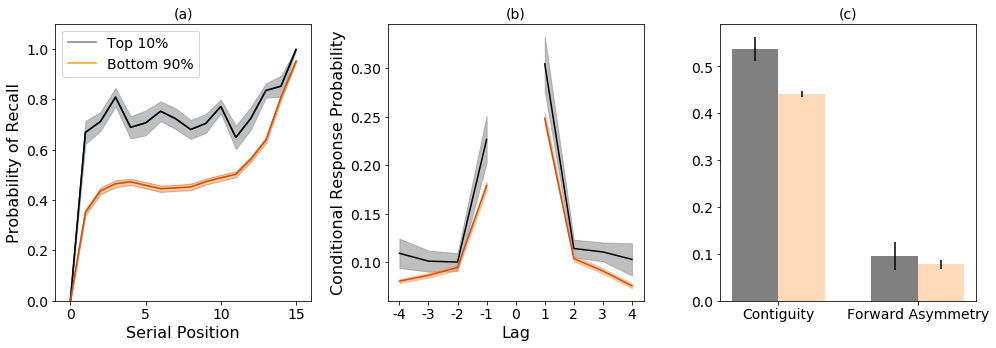

In [5]:
plotpatterns.plot_behav2(spcs[7], pfrs[7], crps[7], spcs[8], pfrs[8], crps[8], "Top 10%","Bottom 90%", "")

#### Result 3: contiguity and forwrd asymetry contribute differently to performance w or w/o primacy

SpearmanrResult(correlation=0.15488636902743785, pvalue=0.04309687469042924)
SpearmanrResult(correlation=0.2783771443330394, pvalue=0.00022718217794395572)
SpearmanrResult(correlation=-0.4392887121556208, pvalue=1.8472621247706445e-09)


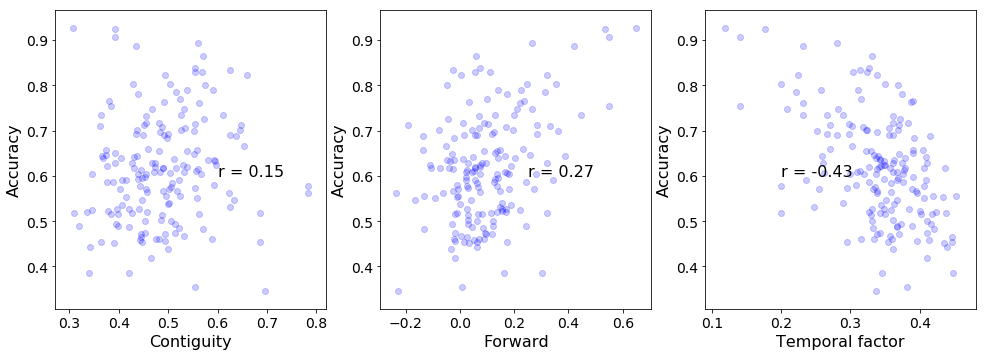

In [15]:
plotpatterns.plot_behav3(spcs[3], pfrs[3], crps[3], tces[3], accs[3],"")

SpearmanrResult(correlation=0.41018197964342407, pvalue=2.523701204424082e-08)
SpearmanrResult(correlation=0.020986758026861712, pvalue=0.7852725086286094)
SpearmanrResult(correlation=-0.15751288497706528, pvalue=0.03963792112319281)


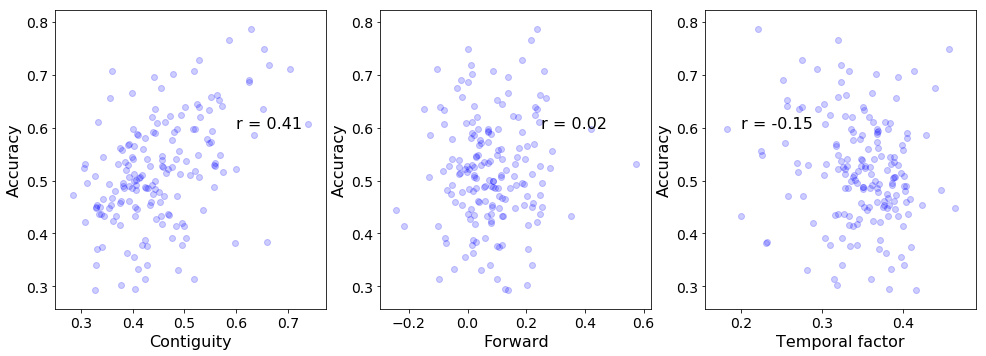

In [16]:
plotpatterns.plot_behav3(spcs[6], pfrs[6], crps[6], tces[6], accs[6],"")

In [9]:
temp = [np.sum([1 for y in x if y==0]) for x in serial_bad[0:20]]
print(np.mean(temp/np.sum(temp)))

0.05


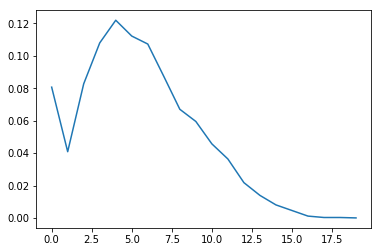

In [8]:
plt.plot(temp/np.sum(temp))
plt.show()

In [ ]:
# all data
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_spc.txt',list(np.mean(spcs,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_pfr.txt',list(np.mean(pfrs,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_crp.txt',list(np.mean(crps,0)))

# divide by PFR[0] - top 10 percent
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_PFR_1_spc.txt',list(np.mean(spc_group1,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_PFR_1_pfr.txt',list(np.mean(pfr_group1,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_PFR_1_crp.txt',list(np.mean(crp_group1,0)))

# divide by PFR[0] - bottom 90 percent
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_PFR_2_spc.txt',list(np.mean(spc_group2,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_PFR_2_pfr.txt',list(np.mean(pfr_group2,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_PFR_2_crp.txt',list(np.mean(crp_group2,0)))

# divide by accuracy - top 10 percent
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_ACC_1_spc.txt',list(np.mean(spc_goods,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_ACC_1_pfr.txt',list(np.mean(pfr_goods,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_ACC_1_crp.txt',list(np.mean(crp_goods,0)))

# divide by accuracy - bottom 90 percent
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_ACC_2_spc.txt',list(np.mean(spc_bads,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_ACC_2_pfr.txt',list(np.mean(pfr_bads,0)))
np.savetxt('/mnt/bucket/people/qiongz/submisions/optimalfreerecall/CMR_prob/data/PEERS_ACC_2_crp.txt',list(np.mean(crp_bads,0)))


In [26]:
# parameter
percent = 90 # percentage used to separate data
MAX_OUTPUT = 50 # code maxmimum 50 outputs per list
exclude = 2 # CRP start calculating from which output position
LIST_NUM = 96 # only take subjects that completed all 6 sessions
LL = 16

# by subject
spcs = []
pfrs = []
crps = []
tces = []
accs = []
nums = []

spcsN = []
pfrsN = []
crpsN = []
tcesN = []
accsN = []
numsN = []

spcs0 = []
pfrs0 = []
crps0 = []
tces0 = []
accs0 = []
nums0 = []

included = []
prims = []
forwards = []
forward_cnts = []
prims_rem = []
recalls_sp_good = [] # top10
recalls_sp_bad = [] # bottom90
recalls_sp_bad2 = [] #bottom10
recalls_sp_last = [] # top10
recalls_sp_first = [] # bottom90

good_subjs = []
spc_goods = []
pfr_goods = []
crp_goods = []
acc_goods = []
spc_bads = []
pfr_bads = []
crp_bads = []  
acc_bads = []
serial_good = [[] for j in range(MAX_OUTPUT)]
serial_bad = [[] for j in range(MAX_OUTPUT)]

good_count = 0
bad_count = 0


spc_group1 = []
pfr_group1 = []
crp_group1 = []
acc_group1 = []
spc_group2 = []
pfr_group2 = []
crp_group2 = []  
acc_group2 = []
serial_group1 = [[] for j in range(MAX_OUTPUT)]
serial_group2 = [[] for j in range(MAX_OUTPUT)]


spc_0 = []
pfr_0 = []
crp_0 = []
acc_0 = []
spc_N = []
pfr_N = []
crp_N = []
acc_N = []
serial_0 = [[] for j in range(MAX_OUTPUT)]
serial_N = [[] for j in range(MAX_OUTPUT)]           

for s, subj in enumerate(subjects):
    if sessionlengths[s]>= LIST_NUM: # include subjects only if there are enough number of lists
        included.append(s)
        recall_sp = [x for i,x in enumerate(recalls_sp) if subjs[i]==s] 
        #recall_sp = [x for i,x in enumerate(recalls_sp) if subjs[i]==s and (0 not in x)]

        acc = np.mean([len(np.unique([x for x in rp if 0<=x<LL])) for rp in recall_sp]) 
        accs.append(acc)
        _,pfr = helper.get_spc_pfr(recall_sp,LL)
        pfrs.append(pfr)
pfrs2 = [x[0] for x in pfrs]  
pfr_threshold = np.percentile(pfrs2,percent)
acc_threshold = np.percentile(accs,percent)
acc_threshold2 = np.percentile(accs,100-percent)


accs = []
pfrs = []



for s, subj in enumerate(subjects):
    cnt_f = 0
    cnt_b = 0
    serial_count_subj = [[] for j in range(MAX_OUTPUT)]
    if sessionlengths[s]>= LIST_NUM: # include subjects only if there are enough number of lists
        included.append(s)
        recall_sp = [x for i,x in enumerate(recalls_sp) if subjs[i]==s]
        #recall_sp = [x for i,x in enumerate(recalls_sp) if subjs[i]==s and (0 not in x)]
        recall_sp_not0 = [x for i,x in enumerate(recalls_sp) if subjs[i]==s and (0 not in x)]# and (1 not in x) and (2 not in x)]
        recall_sp_0 = [x for i,x in enumerate(recalls_sp) if subjs[i]==s and (0 in x[0:5])]# or (1 in x) or (2 in x))] 
         

        spc,pfr = helper.get_spc_pfr(recall_sp,LL)
        crp,tce = helper.get_crp(recall_sp,4,LL,exclude)
        acc = np.mean([len(np.unique([x for x in rp if 0<=x<LL])) for rp in recall_sp]) 
        num = len(recall_sp)
 

        spcN,pfrN = helper.get_spc_pfr(recall_sp_not0,LL)
        crpN,tceN = helper.get_crp(recall_sp_not0,4,LL,exclude)
        accN = np.mean([len(np.unique([x for x in rp if 0<=x<LL])) for rp in recall_sp_not0]) 
        numN = len(recall_sp_not0)        
        
        spc0,pfr0 = helper.get_spc_pfr(recall_sp_0,LL)
        crp0,tce0 = helper.get_crp(recall_sp_0,4,LL,exclude)
        acc0 = np.mean([len(np.unique([x for x in rp if 0<=x<LL])) for rp in recall_sp_0]) 
        num0 = len(recall_sp_0)        

        # REMOTE    
        posRem = np.zeros(LL)
        for trial_id,trial in enumerate(recall_sp):
            recallornot = np.zeros(LL)
            for item_id,item in enumerate(trial):
                serialnum = trial[item_id]
                if item_id > 0:
                    pres_serialnum = trial[item_id-1]
                    recallornot[pres_serialnum] = 1 
                    
                    if pres_serialnum >= 0 and serialnum >= 0:
                        if serialnum > pres_serialnum:
                            cnt_f = cnt_f + 1
                        else:
                            cnt_b = cnt_b + 1
                            
                    if pres_serialnum >= 0 and serialnum >= 0 and np.abs(pres_serialnum - serialnum) > 1 and recallornot[serialnum] == 0:
                        posRem[serialnum] = posRem[serialnum]+1
                        
         
        
                if item_id < MAX_OUTPUT and serialnum > -1 and recallornot[serialnum] == 0: # if it is a correct and non-recalled item
                    serial_count_subj[item_id].append(serialnum)
        
        
        prim = np.mean(pfr[0:2])/np.mean(pfr[LL-2:])
        prim_rem = posRem[0]/np.mean(posRem)
        forward = np.mean(crp[5:9])/np.mean(crp[0:3])
        spcs.append(spc)
        pfrs.append(pfr)
        crps.append(crp)
        accs.append(acc)
        tces.append(tce)
        nums.append(num)
        prims.append(prim)
        forwards.append(forward)
        forward_cnts.append(cnt_f/cnt_b)
        prims_rem.append(prim_rem)
        
        spcsN.append(spcN)
        pfrsN.append(pfrN)
        crpsN.append(crpN)
        accsN.append(accN)
        tcesN.append(tceN)
        numsN.append(numN)        
        
        spcs0.append(spc0)
        pfrs0.append(pfr0)
        crps0.append(crp0)
        accs0.append(acc0)
        tces0.append(tce0)
        nums0.append(num0)
            
        if acc > acc_threshold:#np.percentile(accs,50): #acc_threshold:
            good_subjs.append(s)
            recalls_sp_good.extend(recall_sp) # joining list of lists
            spc_goods.append(spc)
            pfr_goods.append(pfr)
            crp_goods.append(crp)
            acc_goods.append(acc)
            for m in range(MAX_OUTPUT):
                serial_good[m].extend(serial_count_subj[m])
        else:    
            recalls_sp_bad.extend(recall_sp)
            spc_bads.append(spc)
            pfr_bads.append(pfr)
            crp_bads.append(crp)
            acc_bads.append(acc)
            for m in range(MAX_OUTPUT):
                serial_bad[m].extend(serial_count_subj[m])

        
        
        if acc < acc_threshold2:
            recalls_sp_bad2.extend(recall_sp)
        
        if pfr[0] > pfr_threshold:#np.percentile(accs,50): #acc_threshold:
            spc_group1.append(spc)
            pfr_group1.append(pfr)
            crp_group1.append(crp)
            recalls_sp_last.extend(recall_sp) # joining list of lists
            acc_group1.append(acc)
            for m in range(MAX_OUTPUT):
                serial_group1[m].extend(serial_count_subj[m])
        else:    
            spc_group2.append(spc)
            pfr_group2.append(pfr)
            crp_group2.append(crp)
            recalls_sp_first.extend(recall_sp) # joining list of lists
            acc_group2.append(acc)
            for m in range(MAX_OUTPUT):
                serial_group2[m].extend(serial_count_subj[m])
                
        if len(recall_sp_0)/len(recall_sp)<0.8:
            spc_N.append(spc)
            pfr_N.append(pfr)
            crp_N.append(crp)
            acc_N.append(acc)
            for m in range(MAX_OUTPUT):
                serial_N[m].extend(serial_count_subj[m])
        else:    
            spc_0.append(spc)
            pfr_0.append(pfr)
            crp_0.append(crp)
            acc_0.append(acc)
            for m in range(MAX_OUTPUT):
                serial_0[m].extend(serial_count_subj[m]) 
                
# pooled across subjects 
spc_good,pfr_good = helper.get_spc_pfr(recalls_sp_good,LL)  
crp_good,tce_good = helper.get_crp(recalls_sp_good,4,LL,exclude)
spc_bad,pfr_bad = helper.get_spc_pfr(recalls_sp_bad,LL)  
crp_bad,tce_bad = helper.get_crp(recalls_sp_bad,4,LL,exclude)
 

print("There are {} subjects in total, each completing 6 sessions of 16 lists.".format(len(spcs)))
print("They add up to a total of {} trials of free recall.".format(len(spcs)*96))

There are 171 subjects in total, each completing 6 sessions of 16 lists.
They add up to a total of 16416 trials of free recall.


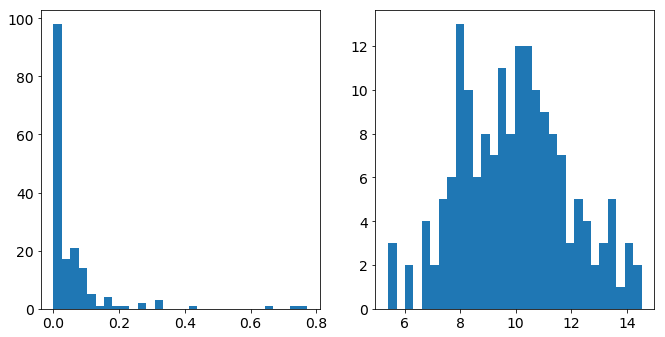

In [16]:
primacy = [x[0]for x in pfrs]
plt.rcParams['figure.figsize'] = (11,5.5)
plt.subplot(1,2,1)
plt.hist(primacy,30)
plt.subplot(1,2,2)
plt.hist(accs,30)
plt.show()

### Divide by porportion of primacy trials

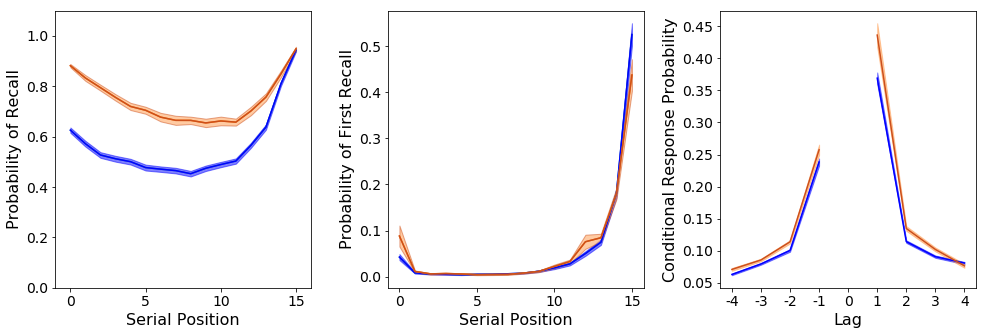

In [22]:
LL=16

left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']



plt.rcParams['figure.figsize'] = (16.5,5.5)
plt.subplot(1,3,1)

data=np.asarray(spc_N)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_N)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='blue')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='blue', facecolor='blue')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])

data=np.asarray(spc_0)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_0)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])


plt.subplot(1,3,2)
data=np.asarray(pfr_N)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_N)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='blue')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='blue', facecolor='blue')

data=np.asarray(pfr_0)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_0)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.ylabel('Probability of First Recall')
plt.xlabel('Serial Position')


plt.subplot(1,3,3)

temp = [x[0:4] for x in crp_N]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_N)-1)
plt.plot(range(4), y, color='blue')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='blue', facecolor='blue')

temp = [x[5:9] for x in crp_N]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_N)-1)
plt.plot([5,6,7,8], y, color='blue')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='blue', facecolor='blue')


temp = [x[0:4] for x in crp_0]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_0)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crp_0]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_0)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')

#plt.adjust(left, bottom, right, top, wspace, hspace) 
#plt.savefig("./Figs/corr_forwardasymmetry.png", format='png')   
#plt.margins(x=0.5, y=0.1)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)    
#plt.savefig('./Figs/fig0625_combined_goodbad90.png') 
plt.show()     


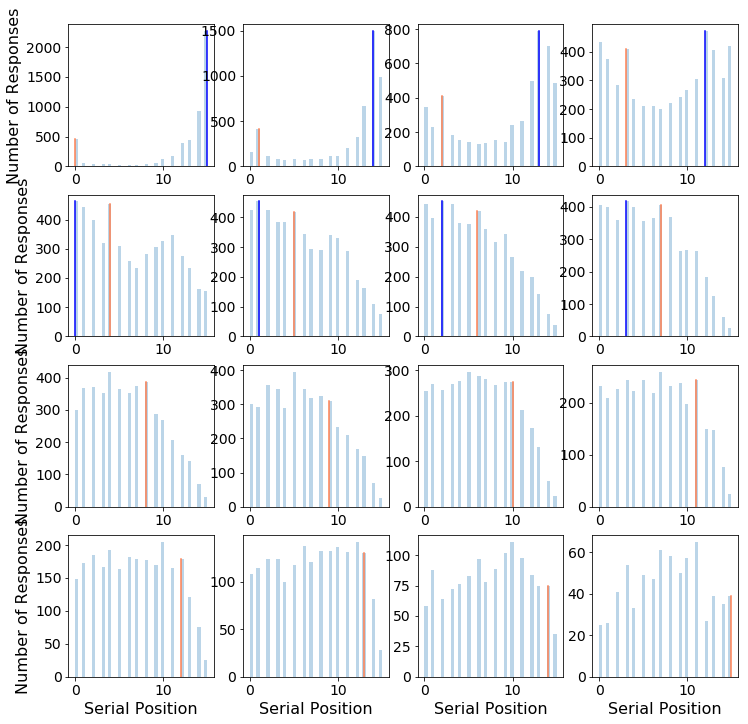

In [38]:
row = 4
column = 4
plt.rcParams['figure.figsize'] = (column*3, row*3)
backwards = [15,14,13,12,0,1,2,3]
for i in range(16):
    plt.subplot(row,column,1+i)
    counts, bin_edges = np.histogram(serial_0[i], bins=LL)
    axes = plt.hist(serial_0[i],histtype='stepfilled', alpha=0.3, bins=40)
    bottom, top = plt.ylim() 
    plt.axvline(x=i,color='coral',ymin=0,ymax=counts[i]/top)
    if i < len(backwards):
        plt.axvline(x=backwards[i],color='blue',ymin=0,ymax=counts[backwards[i]]/top)
    if i%4==0:
        plt.ylabel('Number of Responses')
    if i>11:
        plt.xlabel('Serial Position')    
#plt.subplots_adjust(left, bottom, right, top, wspace, hspace)             
plt.show()   

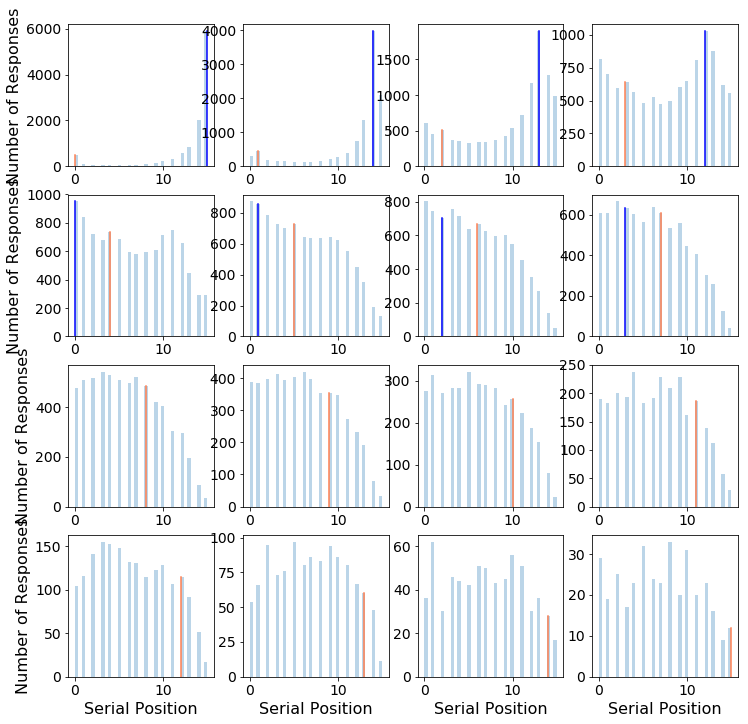

In [40]:
row = 4
column = 4
plt.rcParams['figure.figsize'] = (column*3, row*3)
backwards = [15,14,13,12,0,1,2,3]
for i in range(16):
    plt.subplot(row,column,1+i)
    counts, bin_edges = np.histogram(serial_N[i], bins=LL)
    axes = plt.hist(serial_N[i],histtype='stepfilled', alpha=0.3, bins=40)
    bottom, top = plt.ylim() 
    plt.axvline(x=i,color='coral',ymin=0,ymax=counts[i]/top)
    if i < len(backwards):
        plt.axvline(x=backwards[i],color='blue',ymin=0,ymax=counts[backwards[i]]/top)
    if i%4==0:
        plt.ylabel('Number of Responses')
    if i>11:
        plt.xlabel('Serial Position')    
#plt.subplots_adjust(left, bottom, right, top, wspace, hspace)             
plt.show() 

### Divide by PFR[0]

SpearmanrResult(correlation=0.4657416737658483, pvalue=1.3718711745508707e-10)


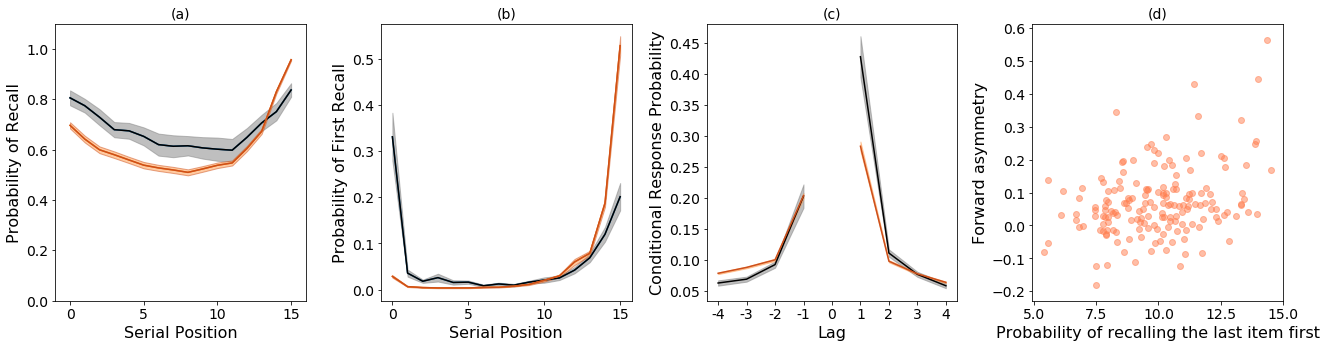

In [37]:
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']



plt.rcParams['figure.figsize'] = (22,5.5)
plt.subplot(1,4,1)
plt.title('(a)')
plt.plot(np.mean(spc_group1,0),'grey')
data=np.asarray(spc_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(spc_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])

plt.subplot(1,4,2)
plt.title('(b)')
data=np.asarray(pfr_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(pfr_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.ylabel('Probability of First Recall')
plt.xlabel('Serial Position')


plt.subplot(1,4,3)
plt.title('(c)')
temp = [x[0:4] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
plt.plot(range(4), y, color='k')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[5:9] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
#plt.plot(y)
plt.plot([5,6,7,8], y, color='k')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[0:4] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')

plt.subplot(1,4,4)
plt.title('(d)')
value1 = [x[0] for x in pfrs]
value2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
print(str(spearmanr(value1,value2)))
plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(accs,value2,color='coral',alpha=0.5)
#plt.legend(['r = -0.80'],frameon=False)
plt.annotate('r = -0.80',xy=(0.5, 0.45))
plt.ylabel('Forward asymmetry')
plt.xlabel('Probability of recalling the last item first')

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)    
#plt.savefig('./Figs/fig0625_combined_lastrecall90.png') 
plt.show()     


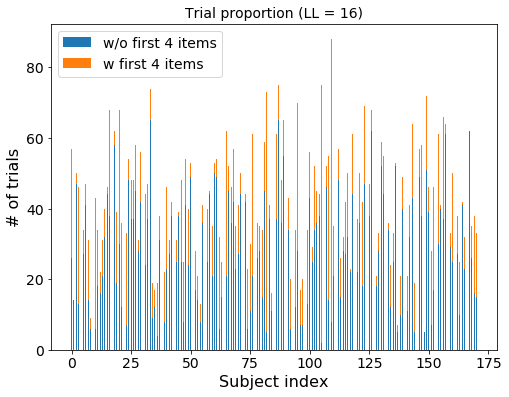

In [97]:
plt.rcParams['figure.figsize'] = (8,6)
N = len(nums)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, numsN, width)#, yerr=menStd)
p2 = plt.bar(ind, nums0, width,
             bottom=numsN)#, yerr=womenStd)
plt.ylabel('# of trials')
plt.xlabel('Subject index')
plt.title('Trial proportion (LL = 16)')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('w/o first 4 items', 'w first 4 items'))

plt.show()

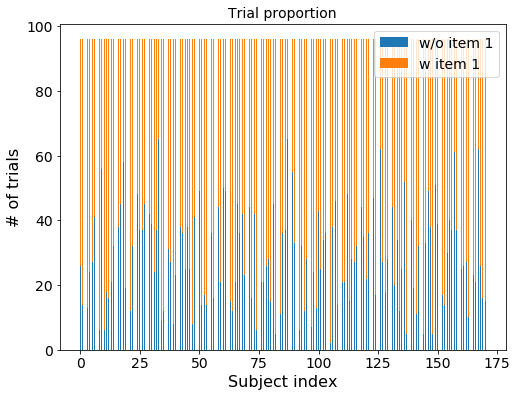

In [25]:
plt.rcParams['figure.figsize'] = (8,6)
N = len(nums)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, numsN, width)#, yerr=menStd)
p2 = plt.bar(ind, nums0, width,
             bottom=numsN)#, yerr=womenStd)
plt.ylabel('# of trials')
plt.xlabel('Subject index')
plt.title('Trial proportion')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('w/o item 1', 'w item 1'))

plt.show()

In [46]:
crpsN[0]

[0.09375,
 0.08695652173913043,
 0.11428571428571428,
 0.14084507042253522,
 0,
 0.18840579710144928,
 0.1044776119402985,
 0.046875,
 0.05263157894736842]

In [47]:
crpsN[0][3]

0.14084507042253522

In [55]:
crpsN[0][5:9]

[0.18840579710144928, 0.1044776119402985, 0.046875, 0.05263157894736842]

#### Trials by primacy

In [72]:
import pingouin as pg
conti0 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps0]
forward0 = [x/LL for x in accs0]
contiN = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crpsN]
forwardN = [x/LL for x in accsN]
pg.partial_corr(data=df, x='tce0', y='accs0', covar=['forward'])

ImportError: No module named 'pingouin'

In [76]:
C = np.array([[np.sum(x[0:4]),np.sum(x[5:9])-np.sum(x[0:4]),tces0[i],accs0[i]] for i,x in enumerate(crps0)])
-np.linalg.inv(np.corrcoef(C.T))

array([[-13.78810375, -13.657397  , -12.15480495,   3.75094047],
       [-13.657397  , -14.98757767, -12.76614336,   3.86352558],
       [-12.15480495, -12.76614336, -12.53946311,   2.55753702],
       [  3.75094047,   3.86352558,   2.55753702,  -2.4982718 ]])

#### All trials

SpearmanrResult(correlation=0.32670128296950385, pvalue=1.2940263124447145e-05)
SpearmanrResult(correlation=0.2872929834616324, pvalue=0.00013900954296604642)
SpearmanrResult(correlation=-0.4164319649336053, pvalue=1.4696432236953434e-08)


Text(0.5, 0, 'Temporal factor')

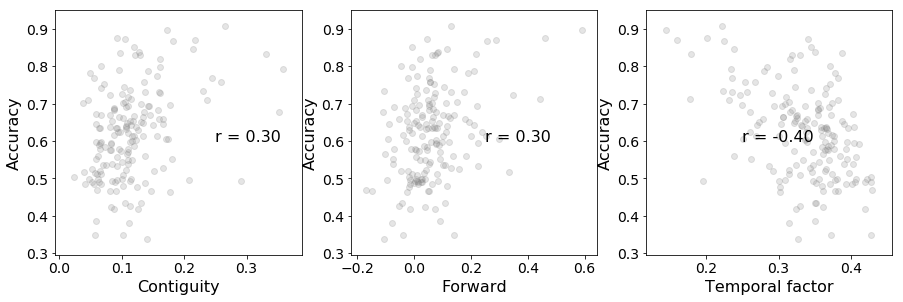

In [69]:
#print(pfr_threshold)
plt.rcParams['figure.figsize'] = (15,4.5)
plt.subplot(1,3,1)
value1 = [x[3]-np.mean(x[0:3]) for x in crps]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='grey',alpha=0.2)
plt.annotate('r = 0.30',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Contiguity')
#plt.title('All subjects')
plt.subplot(1,3,2)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='grey',alpha=0.2)
plt.annotate('r = 0.30',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
#plt.title('All subjects')
plt.subplot(1,3,3)
value1 = tces
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='grey',alpha=0.2)
plt.annotate('r = -0.40',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Temporal factor')
#plt.title('All subjects')

In [75]:
y

0.6295572916666666

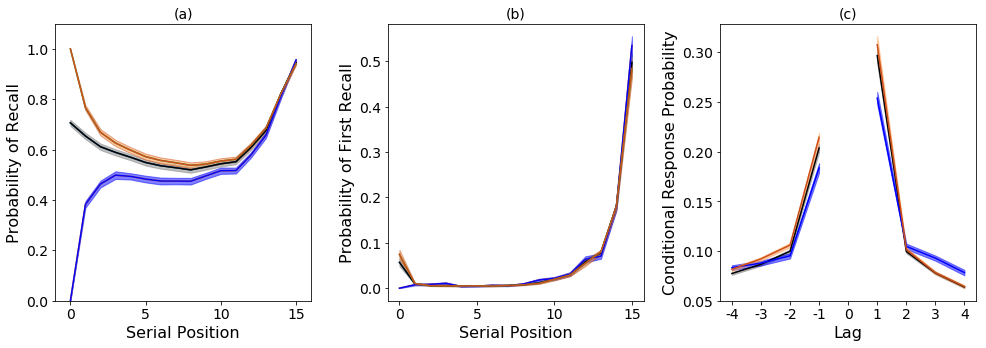

In [22]:
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']



plt.rcParams['figure.figsize'] = (16.5,5.5)
plt.subplot(1,3,1)
plt.title('(a)')
plt.plot(np.mean(spcs,0),'grey')
data=np.asarray(spcs)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spcs)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(spcsN)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spcsN)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='blue')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='blue', facecolor='blue')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])

data=np.asarray(spcs0)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spcs0)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])


plt.subplot(1,3,2)
plt.title('(b)')
data=np.asarray(pfrs)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfrs)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(pfrsN)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfrsN)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='blue')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='blue', facecolor='blue')

data=np.asarray(pfrs0)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfrs0)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.ylabel('Probability of First Recall')
plt.xlabel('Serial Position')


plt.subplot(1,3,3)
plt.title('(c)')
temp = [x[0:4] for x in crps]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crps)-1)
plt.plot(range(4), y, color='k')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[5:9] for x in crps]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crps)-1)
#plt.plot(y)
plt.plot([5,6,7,8], y, color='k')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')


temp = [x[0:4] for x in crpsN]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crpsN)-1)
plt.plot(range(4), y, color='blue')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='blue', facecolor='blue')

temp = [x[5:9] for x in crpsN]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crpsN)-1)
plt.plot([5,6,7,8], y, color='blue')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='blue', facecolor='blue')


temp = [x[0:4] for x in crps0]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crps0)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crps0]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crps0)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')

#plt.adjust(left, bottom, right, top, wspace, hspace) 
#plt.savefig("./Figs/corr_forwardasymmetry.png", format='png')   
#plt.margins(x=0.5, y=0.1)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)    
#plt.savefig('./Figs/fig0625_combined_goodbad90.png') 
plt.show()     


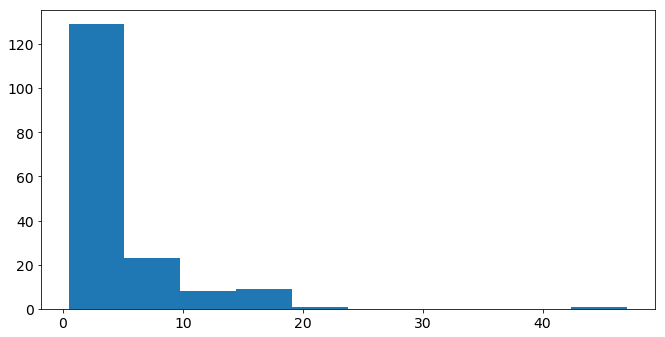

In [30]:
plt.hist(value2)
plt.show()

SpearmanrResult(correlation=-0.31142759039576534, pvalue=3.381008360814307e-05)
SpearmanrResult(correlation=-0.13910530805902646, pvalue=0.06959644064436435)


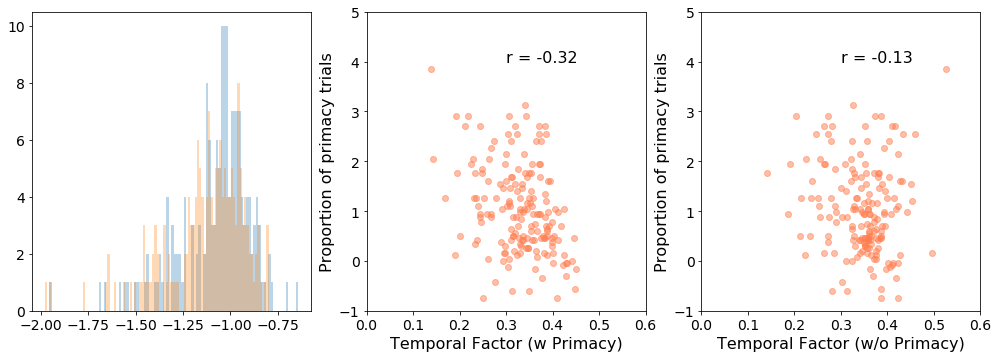

In [56]:
plt.rcParams['figure.figsize'] = (17,5.5)
plt.subplot(1,3,1)
plt.hist(np.log(tcesN),100,alpha=0.3)
plt.hist(np.log(tces0),100,alpha=0.3)
plt.subplot(1,3,2)
value1 = tces0
value2 = [nums0[i]/numsN[i] for i in range(len(nums0))]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,np.log(value2),color='coral',alpha=0.5)
plt.annotate('r = -0.32',xy=(0.3, 4))
plt.axis([0,0.6,-1,5])
plt.xlabel('Temporal Factor (w Primacy)')
plt.ylabel('Proportion of primacy trials')
plt.subplot(1,3,3)
value1 = tcesN
value2 = [nums0[i]/numsN[i] for i in range(len(nums0))]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,np.log(value2),color='coral',alpha=0.5)
plt.annotate('r = -0.13',xy=(0.3, 4))
plt.axis([0,0.6,-1,5])
plt.xlabel('Temporal Factor (w/o Primacy)')
plt.ylabel('Proportion of primacy trials')
plt.show()

In [51]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy import stats
# seed the random number generator
seed(1)
# non-parametric
stat, p = mannwhitneyu(tcesN, tces0)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
# indpendent t-test
stats.ttest_ind(tcesN, tces0)    

Statistics=12379.000, p=0.007
Different distribution (reject H0)


Ttest_indResult(statistic=2.426336010677979, pvalue=0.01577165826578578)

Text(0.5, 0, 'first few # output positions removed')

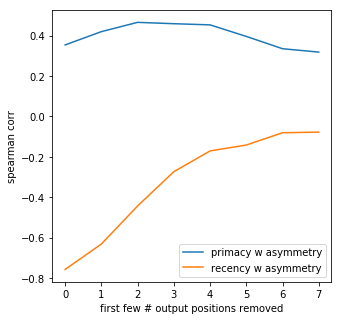

In [15]:
plt.rcParams['figure.figsize'] = (5,5)
plt.plot(correlations0)
plt.plot(correlations)
plt.legend(['primacy w asymmetry','recency w asymmetry'])
plt.ylabel('spearman corr')
plt.xlabel('first few # output positions removed')

Text(0.5, 0, 'Lag')

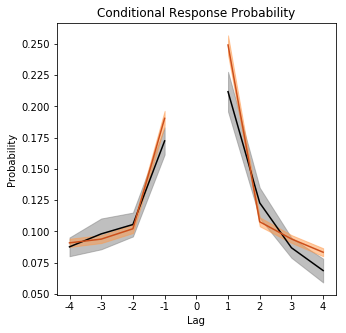

In [7]:
plt.rcParams['figure.figsize'] = (5,5)

temp = [x[0:4] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
plt.plot(range(4), y, color='k')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[5:9] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
#plt.plot(y)
plt.plot([5,6,7,8], y, color='k')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[0:4] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.title('Conditional Response Probability')
plt.ylabel('Probability')
plt.xlabel('Lag')

0.33072916666666663
0.028696236559139787
SpearmanrResult(correlation=-0.09718750956617835, pvalue=0.20602699729523266)
SpearmanrResult(correlation=0.15498260496951669, pvalue=0.5665604734991398)
SpearmanrResult(correlation=-0.107513124437875, pvalue=0.1830062092984416)


Text(0.5, 1.0, 'Half subjects: $\\mu_{y}$ = 0.27')

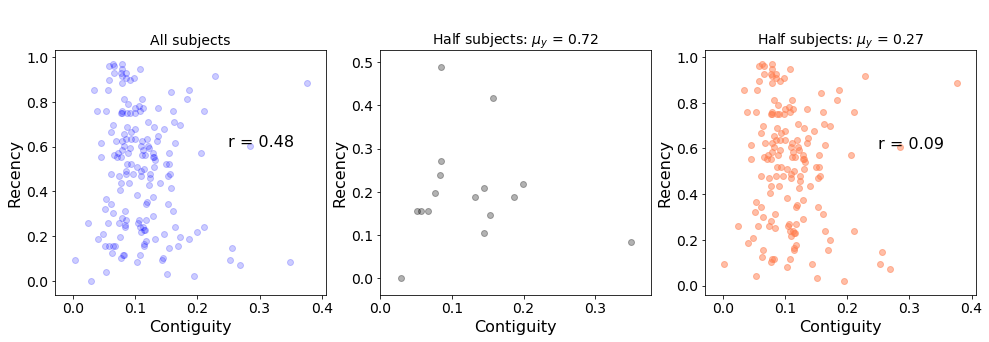

In [38]:
#print(pfr_threshold)
print(np.mean([x[0] for x in pfr_group1]))
print(np.mean([x[0] for x in pfr_group2]))
plt.rcParams['figure.figsize'] = (16.5,4.5)
plt.subplot(1,3,1)
value1 = [x[3]-np.mean(x[0:3]) for x in crps]
value2 = [x[-1] for x in pfrs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='blue',alpha=0.2)
plt.annotate('r = 0.48',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Recency')
plt.xlabel('Contiguity')
plt.title('All subjects')
plt.subplot(1,3,2)
value1 = [x[3]-np.mean(x[0:3]) for x in crp_group1]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x[-1] for x in pfr_group1]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='black',alpha=0.3)
plt.annotate('r = 0.54',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Recency')
plt.xlabel('Contiguity')
plt.title('Half subjects: $\mu_{y}$ = 0.72')
plt.subplot(1,3,3)
value1 = [x[3]-np.mean(x[0:3]) for x in crp_group2]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x[-1] for x in pfr_group2]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.annotate('r = 0.09',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Recency')
plt.xlabel('Contiguity')
plt.title('Half subjects: $\mu_{y}$ = 0.27')

0.0
0.0
SpearmanrResult(correlation=0.046413507173821096, pvalue=0.5466359581612212)
SpearmanrResult(correlation=-0.08326967150496561, pvalue=0.639645372173965)
SpearmanrResult(correlation=0.08816813621488856, pvalue=0.30558845549758135)


Text(0.5, 1.0, 'Half subjects: $\\mu_{y}$ = 0.27')

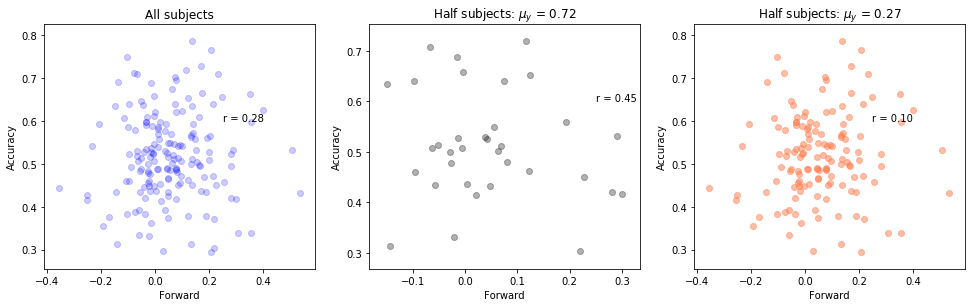

In [12]:
#print(pfr_threshold)
print(np.mean([x[0] for x in pfr_group1]))
print(np.mean([x[0] for x in pfr_group2]))
plt.rcParams['figure.figsize'] = (16.5,4.5)
plt.subplot(1,3,1)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='blue',alpha=0.2)
plt.annotate('r = 0.28',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
plt.title('All subjects')
plt.subplot(1,3,2)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crp_group1]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group1]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='black',alpha=0.3)
plt.annotate('r = 0.45',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
plt.title('Half subjects: $\mu_{y}$ = 0.72')
plt.subplot(1,3,3)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crp_group2]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group2]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.annotate('r = 0.10',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
plt.title('Half subjects: $\mu_{y}$ = 0.27')

0.33072916666666663
0.028696236559139787
SpearmanrResult(correlation=0.3026699003280717, pvalue=5.729541522238138e-05)
SpearmanrResult(correlation=0.4323529411764706, pvalue=0.09442103753478695)
SpearmanrResult(correlation=0.2663498808481985, pvalue=0.0008083746882448007)


Text(0.5, 1.0, 'Half subjects: $\\mu_{y}$ = 0.27')

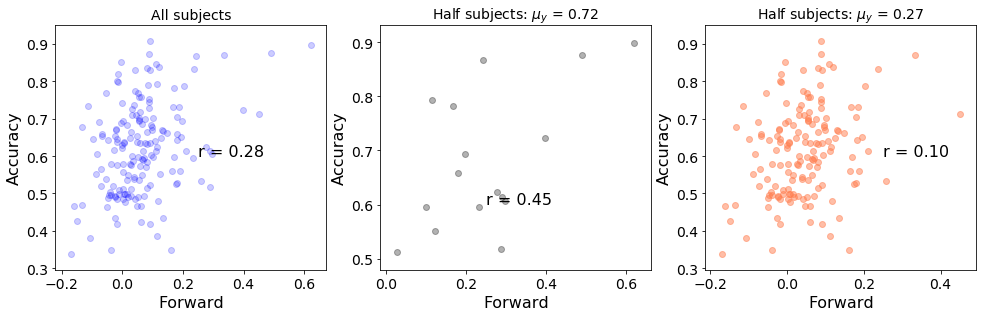

In [39]:
#print(pfr_threshold)
print(np.mean([x[0] for x in pfr_group1]))
print(np.mean([x[0] for x in pfr_group2]))
plt.rcParams['figure.figsize'] = (16.5,4.5)
plt.subplot(1,3,1)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='blue',alpha=0.2)
plt.annotate('r = 0.28',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
plt.title('All subjects')
plt.subplot(1,3,2)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crp_group1]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group1]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='black',alpha=0.3)
plt.annotate('r = 0.45',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
plt.title('Half subjects: $\mu_{y}$ = 0.72')
plt.subplot(1,3,3)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crp_group2]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group2]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.annotate('r = 0.10',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
plt.title('Half subjects: $\mu_{y}$ = 0.27')

0.0
0.0
SpearmanrResult(correlation=0.07083945832235847, pvalue=0.35720236289197904)
SpearmanrResult(correlation=0.2064171122994652, pvalue=0.2414965603089828)
SpearmanrResult(correlation=0.02807715149505172, pvalue=0.7446606493841501)


Text(0.5, 1.0, 'Half subjects: $\\mu_{y}$ = 0.27')

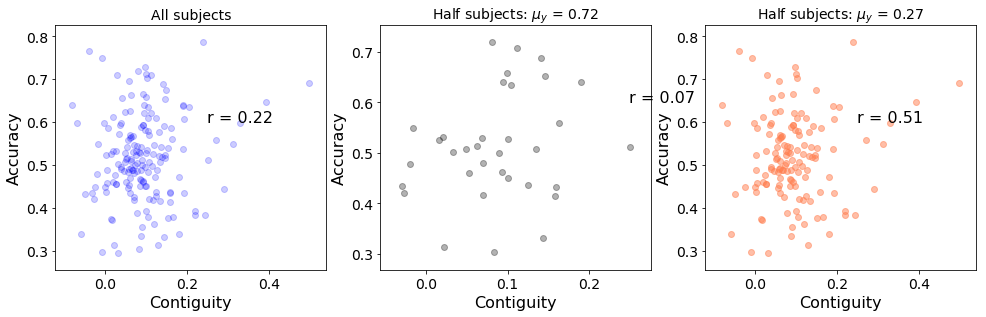

In [21]:
#print(pfr_threshold)
print(np.mean([x[0] for x in pfr_group1]))
print(np.mean([x[0] for x in pfr_group2]))
plt.rcParams['figure.figsize'] = (16.5,4.5)
plt.subplot(1,3,1)
value1 = [x[3]-np.mean(x[0:3]) for x in crps]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='blue',alpha=0.2)
plt.annotate('r = 0.22',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Contiguity')
plt.title('All subjects')
plt.subplot(1,3,2)
value1 = [x[3]-np.mean(x[0:3]) for x in crp_group1]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group1]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='black',alpha=0.3)
plt.annotate('r = 0.07',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Contiguity')
plt.title('Half subjects: $\mu_{y}$ = 0.72')
plt.subplot(1,3,3)
value1 = [x[3]-np.mean(x[0:3]) for x in crp_group2]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group2]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.annotate('r = 0.51',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Contiguity')
plt.title('Half subjects: $\mu_{y}$ = 0.27')

0.33072916666666663
0.028696236559139787
SpearmanrResult(correlation=0.30330230513442513, pvalue=5.518489778197349e-05)
SpearmanrResult(correlation=0.2764705882352941, pvalue=0.2999421284923735)
SpearmanrResult(correlation=0.30512956240933076, pvalue=0.00011312706774367198)


Text(0.5, 1.0, 'Half subjects: $\\mu_{y}$ = 0.27')

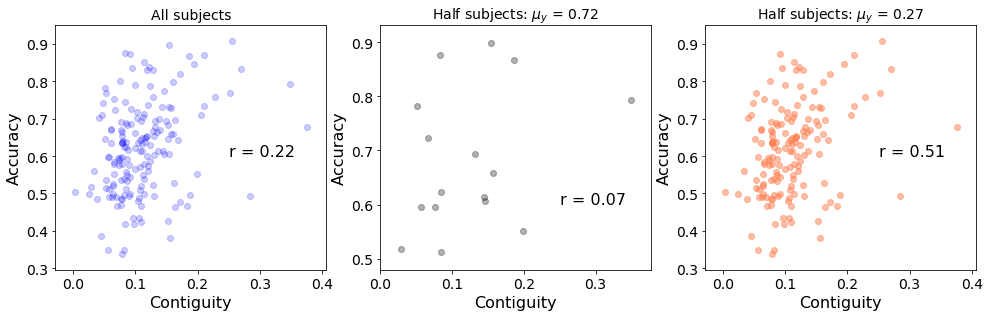

In [40]:
#print(pfr_threshold)
print(np.mean([x[0] for x in pfr_group1]))
print(np.mean([x[0] for x in pfr_group2]))
plt.rcParams['figure.figsize'] = (16.5,4.5)
plt.subplot(1,3,1)
value1 = [x[3]-np.mean(x[0:3]) for x in crps]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='blue',alpha=0.2)
plt.annotate('r = 0.22',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Contiguity')
plt.title('All subjects')
plt.subplot(1,3,2)
value1 = [x[3]-np.mean(x[0:3]) for x in crp_group1]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group1]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='black',alpha=0.3)
plt.annotate('r = 0.07',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Contiguity')
plt.title('Half subjects: $\mu_{y}$ = 0.72')
plt.subplot(1,3,3)
value1 = [x[3]-np.mean(x[0:3]) for x in crp_group2]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group2]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.annotate('r = 0.51',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Contiguity')
plt.title('Half subjects: $\mu_{y}$ = 0.27')

SpearmanrResult(correlation=0.28728938343427174, pvalue=0.00013903757935649938)


Text(0.5, 0, 'Values1')

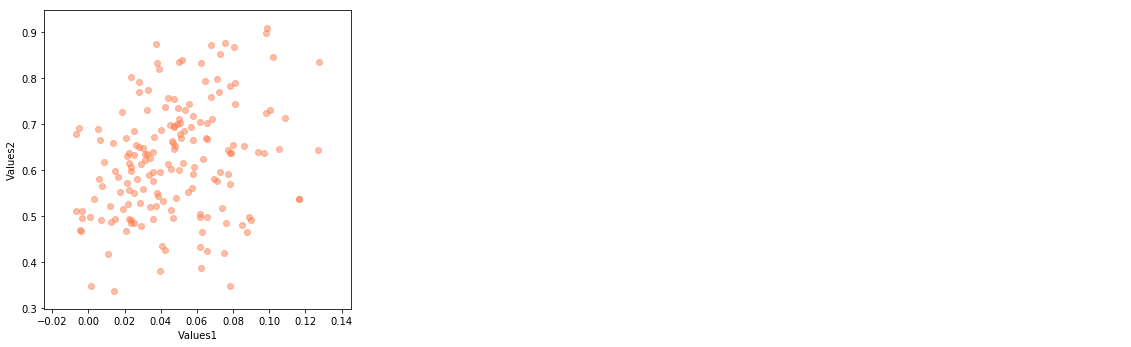

In [62]:
plt.rcParams['figure.figsize'] = (5.5,5.5)
#value1 = [x[3]-np.mean(x[0:3]) for x in crps]
#value1 = [x[5]/x[3] for x in crps]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfrs]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.annotate('r = 0.29',xy=(0.55, 0.7))
#plt.axis([0,0.5,0,1])
plt.ylabel('Values2')
plt.xlabel('Values1')

In [5]:
acc = [len(np.unique([x for x in rp if 0<=x<=15]))/LL for rp in recalls_sp]
print("There are {} subjects.".format(len(spcs)))
print("In total {} trials.".format(len(recalls_sp)))
print("Average acccuracy is {}.".format(np.mean(acc)))
print("Standard deviation of acccuracy is {}.".format(np.std(acc)))

There are 171 subjects.
In total 17341 trials.
Average acccuracy is 0.6176006285681334.
Standard deviation of acccuracy is 0.19920556304082737.


In [52]:
print("There are {} good subjects.".format(len(spc_goods)))
print("In total {} trials.".format(len(recalls_sp_good)))
print("Mean performance for good subjects is {}.".format(np.mean(acc_goods)/16))
print("There are {} bad subjects.".format(len(spc_bads)))
print("In total {} trials.".format(len(recalls_sp_bad)))
print("Mean performance for bad subjects is {}.".format(np.mean(acc_bads)/16))

There are 17 good subjects.
In total 1632 trials.
Mean performance for good subjects is 0.845358455882353.
There are 154 bad subjects.
In total 14784 trials.
Mean performance for bad subjects is 0.596586681547619.


In [57]:
print("There are {} group 1 subjects.".format(len(spc_group1)))
print("PFR is {} for last position.".format(np.mean([x[-1] for x in pfr_group1])))
#print("Mean performance for good subjects is {}.".format(np.mean(acc_goods)/16))
print("There are {} group 2 subjects.".format(len(spc_group2)))
print("PFR is {} for last position.".format(np.mean([x[-1] for x in pfr_group2])))
#print("Mean performance for bad subjects is {}.".format(np.mean(acc_bads)/16))

There are 17 group 1 subjects.
PFR is 0.9258578431372548 for last position.
There are 154 group 2 subjects.
PFR is 0.4499458874458875 for last position.


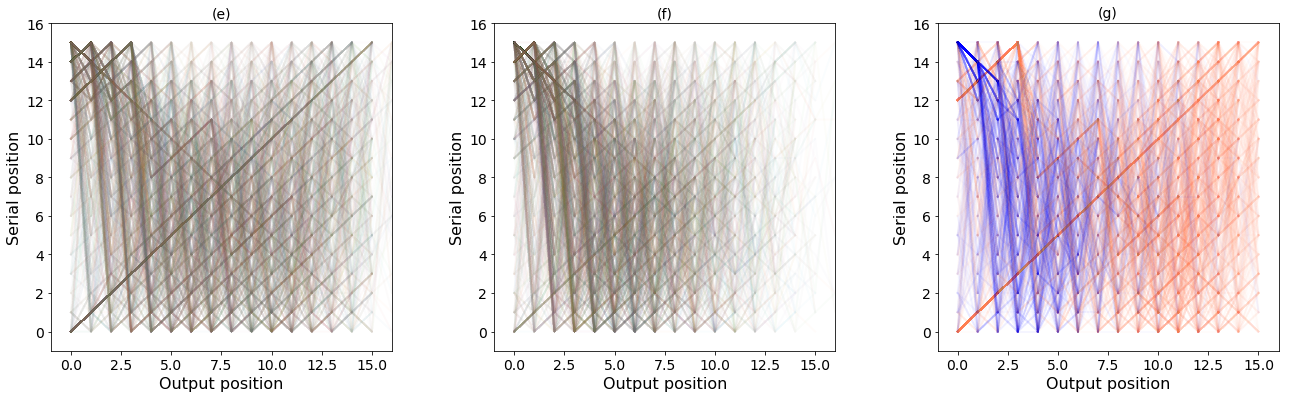

In [30]:
plot_behav4(recalls_sp_good,recalls_sp_bad,"")

In [29]:
def plot_behav4(recalls_sp_good,recalls_sp_bad,filename):
    ll=16
    trans_good = helper.calc_trans(recalls_sp_good,16)
    trans_bad = helper.calc_trans(recalls_sp_bad[0:len(recalls_sp_good)],16)

    # Figure settings
    left = 0.125  # the left side of the subplots of the figure
    right = 0.9   # the right side of the subplots of the figure
    bottom = 0.2  # the bottom of the subplots of the figure
    top = 0.9     # the top of the subplots of the figure
    wspace = 0.3  # the amount of width reserved for space between subplots,
                 # expressed as a fraction of the average axis width
    hspace = 0.5  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 16
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
    colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']

    plt.rcParams['figure.figsize'] = (22,6.5)
    plt.subplot(1,3,1)
    plt.title('(e)')
    for i in range(len(recalls_sp_good)):
        temp = [x for x in recalls_sp_good[i] if x>-1]
        plt.plot(temp,alpha=0.02,linewidth=2,ls='-')
    plt.ylabel('Serial position')
    plt.xlabel('Output position')
    plt.axis([-1,16,-1,16])

    plt.subplot(1,3,2)
    plt.title('(f)')
    shuffled_indice = list(range(len(recalls_sp_bad)))
    for i in shuffled_indice[0:len(recalls_sp_good)]: # same number of trials as in recalls_sp_good
        temp = [x for x in recalls_sp_bad[i] if x>-1]
        plt.plot(temp,alpha=0.02,linewidth=2,ls='-')  
    plt.ylabel('Serial position')
    plt.xlabel('Output position')
    plt.axis([-1,16,-1,16])

    plt.subplot(1,3,3)
    plt.title('(g)')
    difference = trans_good - trans_bad
    for i in range(ll):
        for m in range(ll):
            for n in range(ll):
                if difference[i][m][n]>0:
                    for t in range(int(difference[i][m][n])):
                        plt.plot([i,i+1],[m,n],alpha=0.02,linewidth=2,ls='-',color='coral')
                elif difference[i][m][n]<0:        
                    for t in range(-int(difference[i][m][n])):
                        plt.plot([i,i+1],[m,n],alpha=0.02,linewidth=2,ls='-',color='b')    
    plt.ylabel('Serial position')
    plt.xlabel('Output position')
    plt.axis([-1,16,-1,16])
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)    
    if filename:
        plt.savefig('./Figs/'+filename) 
    plt.show()


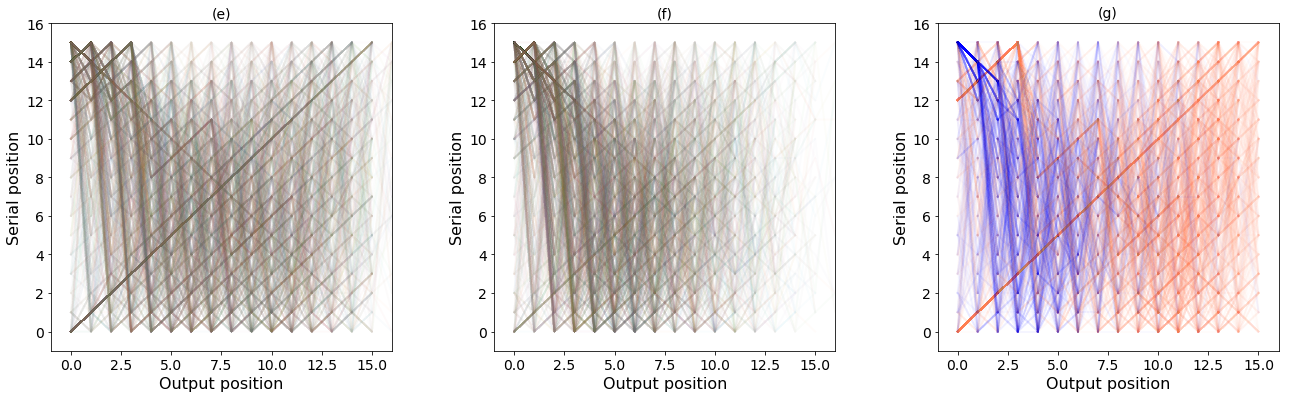

In [12]:
ll=16
trans_good = helper.calc_trans(recalls_sp_good,16)
trans_bad = helper.calc_trans(recalls_sp_bad[0:len(recalls_sp_good)],16)
#trans_bad2 = calc_trans(recalls_sp_bad2,16)

# Figure settings
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']

plt.rcParams['figure.figsize'] = (22,6.5)
plt.subplot(1,3,1)
plt.title('(e)')
for i in range(len(recalls_sp_good)):
    temp = [x for x in recalls_sp_good[i] if x>-1]
    plt.plot(temp,alpha=0.02,linewidth=2,ls='-')
plt.ylabel('Serial position')
plt.xlabel('Output position')
plt.axis([-1,16,-1,16])

plt.subplot(1,3,2)
plt.title('(f)')
#for i in range(len(recalls_sp_bad)):
for i in range(1632): # same number of trials as in recalls_sp_good
    temp = [x for x in recalls_sp_bad[i] if x>-1]
    plt.plot(temp,alpha=0.02,linewidth=2,ls='-')  
plt.ylabel('Serial position')
plt.xlabel('Output position')
plt.axis([-1,16,-1,16])

plt.subplot(1,3,3)
plt.title('(g)')
difference = trans_good - trans_bad
for i in range(ll):
    for m in range(ll):
        for n in range(ll):
            if difference[i][m][n]>0:
                for t in range(int(difference[i][m][n])):
                    plt.plot([i,i+1],[m,n],alpha=0.02,linewidth=2,ls='-',color='coral')
            elif difference[i][m][n]<0:        
                for t in range(-int(difference[i][m][n])):
                    plt.plot([i,i+1],[m,n],alpha=0.02,linewidth=2,ls='-',color='b')    
plt.ylabel('Serial position')
plt.xlabel('Output position')
plt.axis([-1,16,-1,16])
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
#plt.savefig('./Figs/fig0622_goodbad_transitions.png')
plt.show()

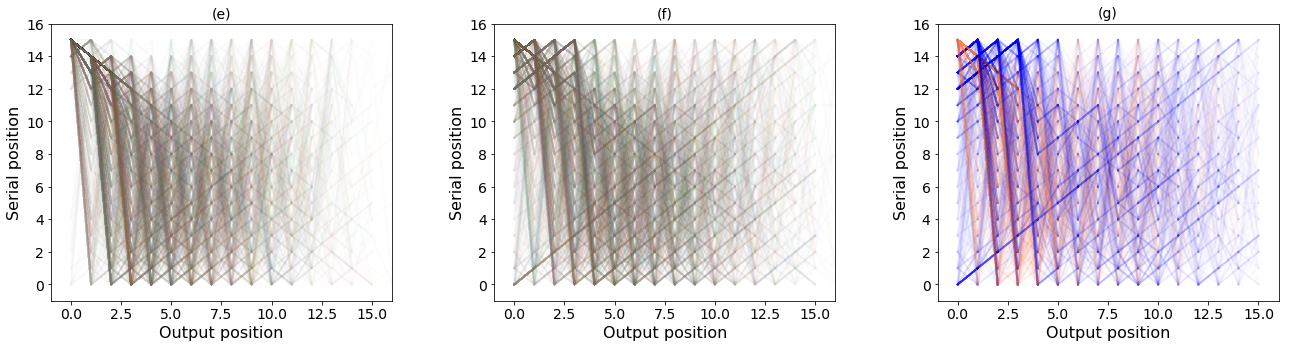

In [44]:
ll = 16
trans_good = calc_trans(recalls_sp_last,16)
trans_bad = calc_trans(recalls_sp_first[0:len(recalls_sp_last)],16)
#trans_bad2 = calc_trans(recalls_sp_bad2,16)

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']

plt.rcParams['figure.figsize'] = (22,5.5)


plt.subplot(1,3,1)
plt.title('(e)')
for i in range(len(recalls_sp_last)):
    temp = [x for x in recalls_sp_last[i] if x>-1]
    plt.plot(temp,alpha=0.02,linewidth=2,ls='-')
plt.ylabel('Serial position')
plt.xlabel('Output position')
plt.axis([-1,16,-1,16])

plt.subplot(1,3,2)
plt.title('(f)')
#for i in range(len(recalls_sp_bad)):
for i in range(1632):
    temp = [x for x in recalls_sp_first[i] if x>-1]
    plt.plot(temp,alpha=0.02,linewidth=2,ls='-')  
plt.ylabel('Serial position')
plt.xlabel('Output position')
plt.axis([-1,16,-1,16])

plt.subplot(1,3,3)
plt.title('(g)')
difference = trans_good - trans_bad
for i in range(ll):
    for m in range(ll):
        for n in range(ll):
            if difference[i][m][n]>0:
                for t in range(int(difference[i][m][n])):
                    plt.plot([i,i+1],[m,n],alpha=0.02,linewidth=2,ls='-',color='coral')
            elif difference[i][m][n]<0:        
                for t in range(-int(difference[i][m][n])):
                    plt.plot([i,i+1],[m,n],alpha=0.02,linewidth=2,ls='-',color='b')    
plt.ylabel('Serial position')
plt.xlabel('Output position')
plt.axis([-1,16,-1,16])
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)  
plt.savefig('./Figs/fig0622_lastfirst_transitions.png')
plt.show()

SpearmanrResult(correlation=0.8579833054370394, pvalue=9.113428146767746e-51)


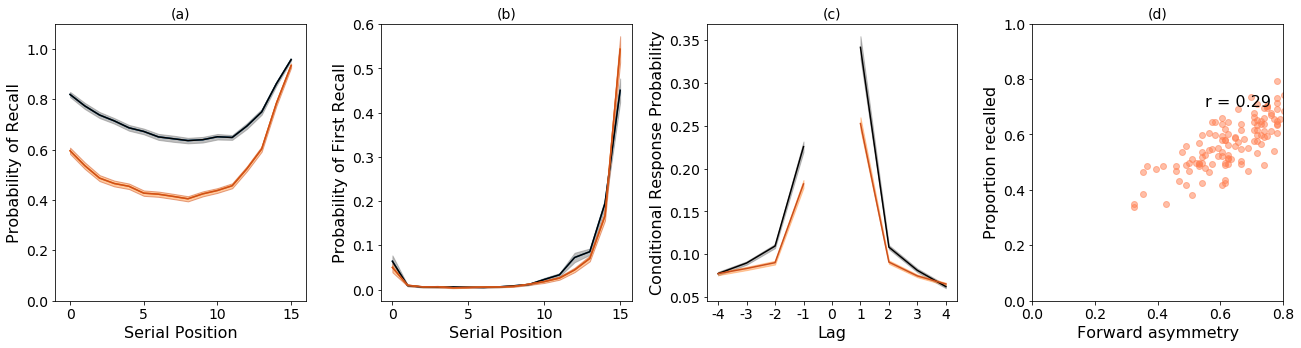

In [24]:
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']



plt.rcParams['figure.figsize'] = (22,5.5)
plt.subplot(1,4,1)
plt.title('(a)')
plt.plot(np.mean(spc_goods,0),'grey')
data=np.asarray(spc_goods)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_goods)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(spc_bads)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_bads)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])

plt.subplot(1,4,2)
plt.title('(b)')
data=np.asarray(pfr_goods)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_goods)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(pfr_bads)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_bads)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.ylabel('Probability of First Recall')
plt.xlabel('Serial Position')


plt.subplot(1,4,3)
plt.title('(c)')
temp = [x[0:4] for x in crp_goods]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_goods)-1)
plt.plot(range(4), y, color='k')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[5:9] for x in crp_goods]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_goods)-1)
#plt.plot(y)
plt.plot([5,6,7,8], y, color='k')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[0:4] for x in crp_bads]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_bads)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crp_bads]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_bads)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')

plt.subplot(1,4,4)
plt.title('(d)')
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
#value1 = [x[3]-np.mean(x[0:3]) for x in crpsN]
value1 = [nums0[i]/(nums0[i]+numsN[i]) for i,x in enumerate(nums0)]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,accs))) 
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.annotate('r = 0.29',xy=(0.55, 0.7))
plt.axis([0,0.8,0,1])
plt.ylabel('Proportion recalled')
plt.xlabel('Forward asymmetry')
#plt.adjust(left, bottom, right, top, wspace, hspace) 
#plt.savefig("./Figs/corr_forwardasymmetry.png", format='png')   
#plt.margins(x=0.5, y=0.1)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)    
#plt.savefig('./Figs/fig0625_combined_goodbad90.png') 
plt.show()     


In [102]:
len(numsN)

171

SpearmanrResult(correlation=0.2499774998594164, pvalue=0.0009757949150140907)


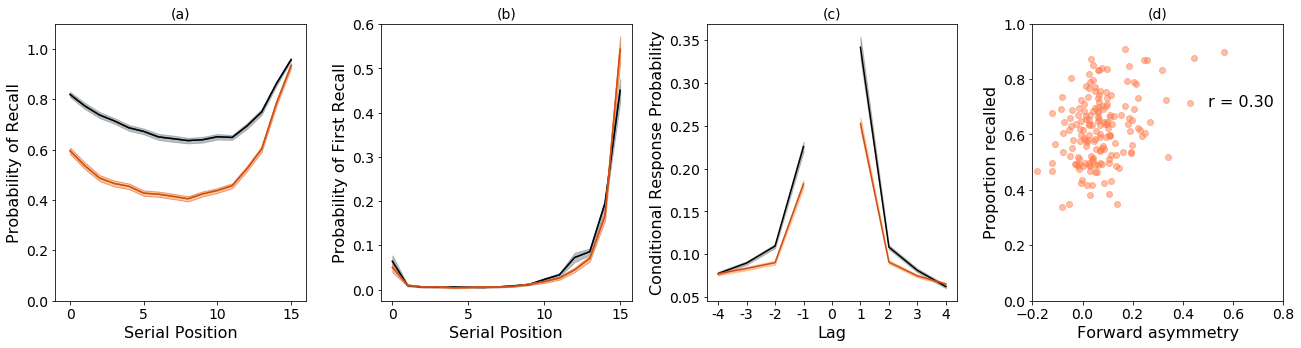

In [4]:
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']



plt.rcParams['figure.figsize'] = (22,5.5)
plt.subplot(1,4,1)
plt.title('(a)')
plt.plot(np.mean(spc_goods,0),'grey')
data=np.asarray(spc_goods)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_goods)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(spc_bads)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_bads)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])

plt.subplot(1,4,2)
plt.title('(b)')
data=np.asarray(pfr_goods)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_goods)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(pfr_bads)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_bads)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.ylabel('Probability of First Recall')
plt.xlabel('Serial Position')


plt.subplot(1,4,3)
plt.title('(c)')
temp = [x[0:4] for x in crp_goods]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_goods)-1)
plt.plot(range(4), y, color='k')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[5:9] for x in crp_goods]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_goods)-1)
#plt.plot(y)
plt.plot([5,6,7,8], y, color='k')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[0:4] for x in crp_bads]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_bads)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crp_bads]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_bads)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')

plt.subplot(1,4,4)
plt.title('(d)')
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,accs))) 
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.annotate('r = 0.30',xy=(0.5, 0.7))
plt.axis([-0.2,0.8,0,1])
plt.ylabel('Proportion recalled')
plt.xlabel('Forward asymmetry')
#plt.adjust(left, bottom, right, top, wspace, hspace) 
#plt.savefig("./Figs/corr_forwardasymmetry.png", format='png')   
#plt.margins(x=0.5, y=0.1)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)    
#plt.savefig('./Figs/fig0625_combined_goodbad90.png') 
plt.show()     


Stats test (https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)

In [48]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy import stats
# seed the random number generator
seed(1)
# non-parametric
stat, p = mannwhitneyu([x[0] for x in pfr_goods], [x[0] for x in pfr_bads])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
# indpendent t-test
stats.ttest_ind([x[0] for x in pfr_goods], [x[0] for x in pfr_bads])    

seed(1)
# non-parametric
stat, p = mannwhitneyu([x[-1] for x in pfr_goods], [x[-1] for x in pfr_bads])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
# indpendent t-test
stats.ttest_ind([x[-1] for x in pfr_goods], [x[-1] for x in pfr_bads])     

Statistics=940.000, p=0.027
Different distribution (reject H0)


Ttest_indResult(statistic=3.8323017132539174, pvalue=0.00017879264493349484)

In [49]:
seed(1)
# non-parametric
stat, p = mannwhitneyu([x[-1] for x in pfr_goods], [x[-1] for x in pfr_bads])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
# indpendent t-test
stats.ttest_ind([x[-1] for x in pfr_goods], [x[-1] for x in pfr_bads])     

Statistics=719.500, p=0.001
Different distribution (reject H0)


Ttest_indResult(statistic=-3.1407766378829955, pvalue=0.0019895735947309664)

SpearmanrResult(correlation=-0.17092308353510413, pvalue=0.025404870262780224)


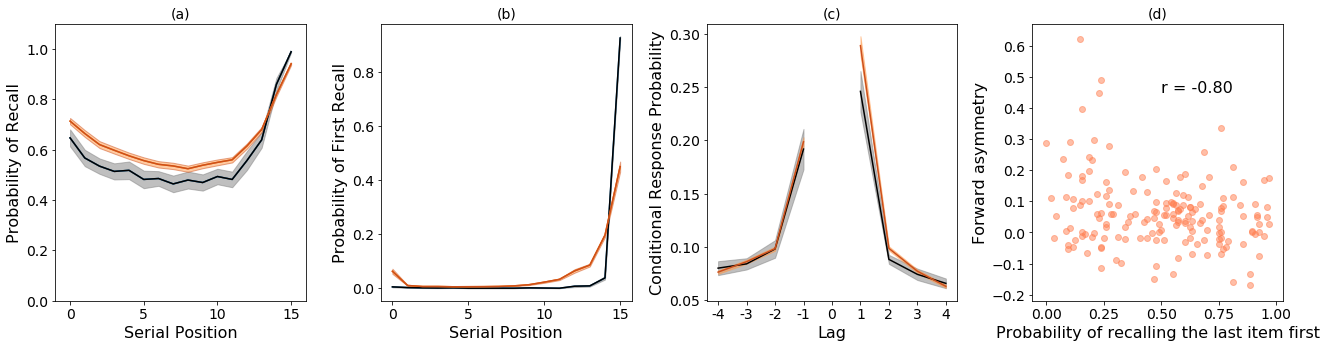

In [111]:
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']



plt.rcParams['figure.figsize'] = (22,5.5)
plt.subplot(1,4,1)
plt.title('(a)')
plt.plot(np.mean(spc_group1,0),'grey')
data=np.asarray(spc_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(spc_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])

plt.subplot(1,4,2)
plt.title('(b)')
data=np.asarray(pfr_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(pfr_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.ylabel('Probability of First Recall')
plt.xlabel('Serial Position')


plt.subplot(1,4,3)
plt.title('(c)')
temp = [x[0:4] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
plt.plot(range(4), y, color='k')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[5:9] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
#plt.plot(y)
plt.plot([5,6,7,8], y, color='k')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[0:4] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')

plt.subplot(1,4,4)
plt.title('(d)')
value1 = [x[-1] for x in pfrs]
value2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
print(str(spearmanr(value1,value2)))
plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(value1,value2,color='coral',alpha=0.5)
#plt.legend(['r = -0.80'],frameon=False)
plt.annotate('r = -0.80',xy=(0.5, 0.45))
plt.ylabel('Forward asymmetry')
plt.xlabel('Probability of recalling the last item first')

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)    
#plt.savefig('./Figs/fig0625_combined_lastrecall90.png') 
plt.show()     


SpearmanrResult(correlation=-0.12691233194274312, pvalue=0.09810374454949446)


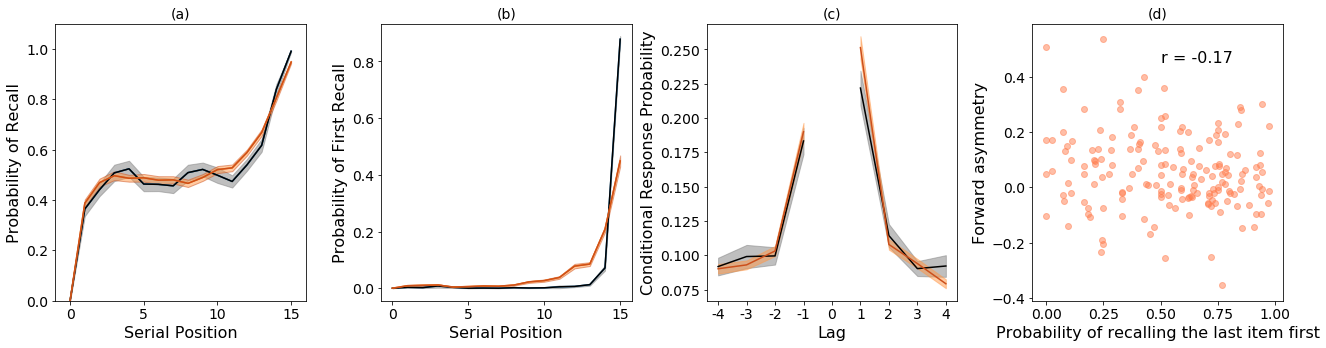

In [22]:
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']



plt.rcParams['figure.figsize'] = (22,5.5)
plt.subplot(1,4,1)
plt.title('(a)')
plt.plot(np.mean(spc_group1,0),'grey')
data=np.asarray(spc_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(spc_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])

plt.subplot(1,4,2)
plt.title('(b)')
data=np.asarray(pfr_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(pfr_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.ylabel('Probability of First Recall')
plt.xlabel('Serial Position')


plt.subplot(1,4,3)
plt.title('(c)')
temp = [x[0:4] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
plt.plot(range(4), y, color='k')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[5:9] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
#plt.plot(y)
plt.plot([5,6,7,8], y, color='k')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[0:4] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')

plt.subplot(1,4,4)
plt.title('(d)')
value1 = [x[-1] for x in pfrs]
value2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
print(str(spearmanr(value1,value2)))
plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(value1,value2,color='coral',alpha=0.5)
#plt.legend(['r = -0.80'],frameon=False)
plt.annotate('r = -0.17',xy=(0.5, 0.45))
plt.ylabel('Forward asymmetry')
plt.xlabel('Probability of recalling the last item first')
plt.savefig('./Figs/fig0831output5.png') 
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)     
plt.show()     


0.33072916666666663
0.028696236559139787
SpearmanrResult(correlation=0.45323386300166774, pvalue=4.822704489351035e-10)


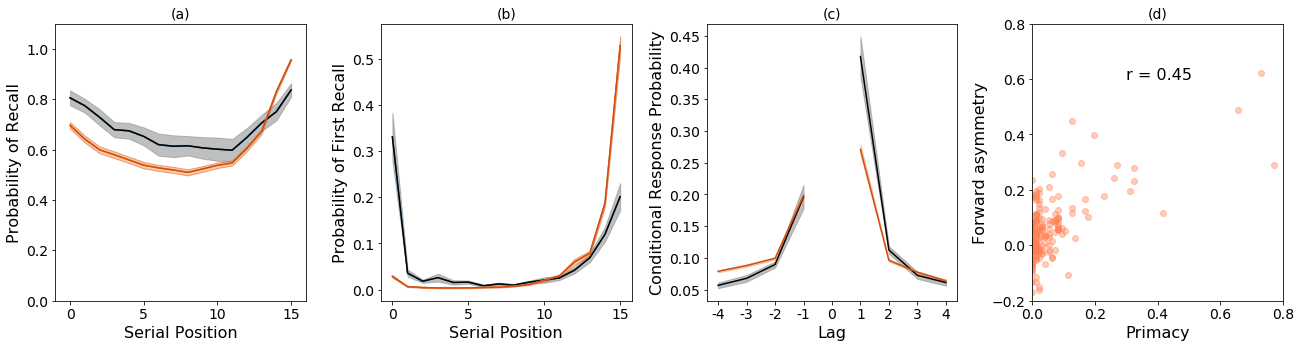

In [91]:
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']


print(np.mean([x[0] for x in pfr_group1]))
print(np.mean([x[0] for x in pfr_group2]))
plt.rcParams['figure.figsize'] = (22,5.5)
plt.subplot(1,4,1)
plt.title('(a)')
plt.plot(np.mean(spc_group1,0),'grey')
data=np.asarray(spc_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(spc_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])

plt.subplot(1,4,2)
plt.title('(b)')
data=np.asarray(pfr_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(pfr_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.ylabel('Probability of First Recall')
plt.xlabel('Serial Position')


plt.subplot(1,4,3)
plt.title('(c)')
temp = [x[0:4] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
plt.plot(range(4), y, color='k')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[5:9] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
#plt.plot(y)
plt.plot([5,6,7,8], y, color='k')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[0:4] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')

plt.subplot(1,4,4)
plt.title('(d)')
value1 = [x[0] for x in pfrs]
value2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
print(str(spearmanr(value1,value2)))
plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(value1,value2,color='coral',alpha=0.4)
#plt.legend(['r = -0.80'],frameon=False)
plt.annotate('r = 0.45',xy=(0.3, 0.6))
plt.ylabel('Forward asymmetry')
plt.xlabel('Primacy')
plt.axis([0,0.8,-0.2,0.8])

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)     
plt.show()     


0.33072916666666663
0.028696236559139787
SpearmanrResult(correlation=0.3026699003280717, pvalue=5.729541522238138e-05)
SpearmanrResult(correlation=0.4323529411764706, pvalue=0.09442103753478695)
SpearmanrResult(correlation=0.2663498808481985, pvalue=0.0008083746882448007)


Text(0.5, 1.0, 'Half subjects: $\\mu_{y}$ = 0.27')

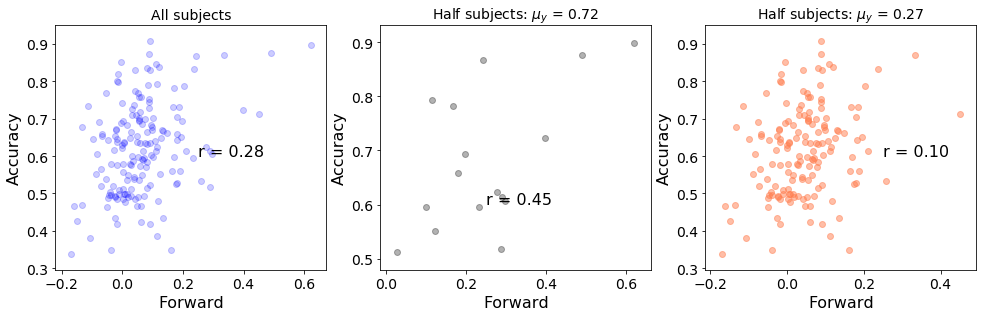

In [69]:
#print(pfr_threshold)
print(np.mean([x[0] for x in pfr_group1]))
print(np.mean([x[0] for x in pfr_group2]))
plt.rcParams['figure.figsize'] = (16.5,4.5)
plt.subplot(1,3,1)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
value2 = [x/LL for x in accs]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='blue',alpha=0.2)
plt.annotate('r = 0.28',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
plt.title('All subjects')
plt.subplot(1,3,2)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crp_group1]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group1]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='black',alpha=0.3)
plt.annotate('r = 0.45',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
plt.title('Half subjects: $\mu_{y}$ = 0.72')
plt.subplot(1,3,3)
value1 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crp_group2]
#value1 = [x[5]-np.mean(x[6:9]) for x in crps]
#value1 = [np.mean(x[5:9])-np.mean(x[0:4]) for x in crps]
#value1 = [x[5]-x[3] for x in crps]
#value2 = [x[-1] for x in pfr_group1]
value2 = [x/LL for x in acc_group2]
print(str(spearmanr(value1,value2))) 
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.annotate('r = 0.10',xy=(0.25, 0.6))
#plt.axis([0,0.5,0,1])
plt.ylabel('Accuracy')
plt.xlabel('Forward')
plt.title('Half subjects: $\mu_{y}$ = 0.27')

SpearmanrResult(correlation=0.45323386300166774, pvalue=4.822704489351035e-10)


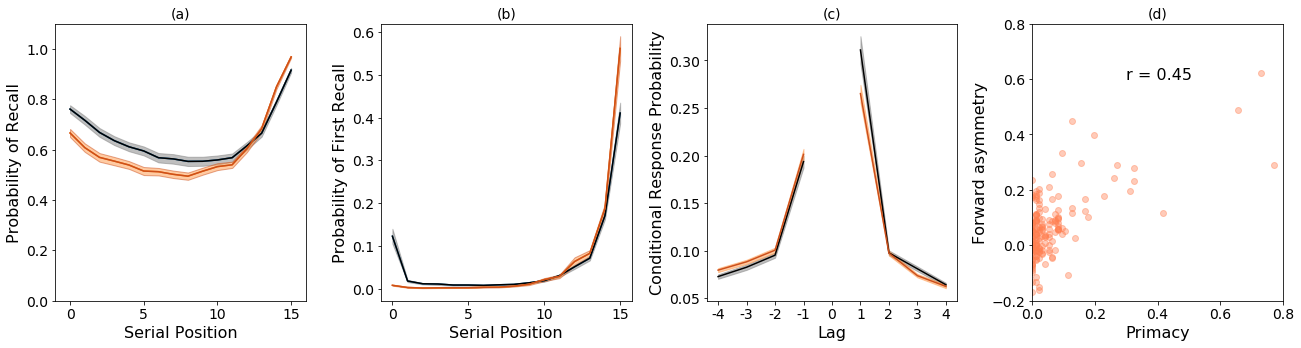

In [65]:
left = 0.125  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.2  # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.3  # the amount of width reserved for space between subplots,
             # expressed as a fraction of the average axis width
hspace = 0.5  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']



plt.rcParams['figure.figsize'] = (22,5.5)
plt.subplot(1,4,1)
plt.title('(a)')
plt.plot(np.mean(spc_group1,0),'grey')
data=np.asarray(spc_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(spc_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(spc_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
#plt.title('Serial position curve')
plt.ylabel('Probability of Recall')
plt.xlabel('Serial Position')
plt.axis([-1,16,0,1.1])

plt.subplot(1,4,2)
plt.title('(b)')
data=np.asarray(pfr_group1)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group1)-1)
plt.plot(y)
plt.plot(range(LL), y, color='k')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

data=np.asarray(pfr_group2)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(pfr_group2)-1)
plt.plot(y)
plt.plot(range(LL), y, 'k', color='#CC4F1B')
plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.ylabel('Probability of First Recall')
plt.xlabel('Serial Position')


plt.subplot(1,4,3)
plt.title('(c)')
temp = [x[0:4] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
plt.plot(range(4), y, color='k')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[5:9] for x in crp_group1]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group1)-1)
#plt.plot(y)
plt.plot([5,6,7,8], y, color='k')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

temp = [x[0:4] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot(range(4), y, color='#CC4F1B')
plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

temp = [x[5:9] for x in crp_group2]
data=np.asarray(temp)
y = np.mean(data,0)
error = np.std(data,0)/np.sqrt(len(crp_group2)-1)
plt.plot([5,6,7,8], y, color='#CC4F1B')
plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
plt.ylabel('Conditional Response Probability')
plt.xlabel('Lag')

plt.subplot(1,4,4)
plt.title('(d)')
value1 = [x[0] for x in pfrs]
value2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
print(str(spearmanr(value1,value2)))
plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(value1,value2,color='coral',alpha=0.4)
#plt.legend(['r = -0.80'],frameon=False)
plt.annotate('r = 0.45',xy=(0.3, 0.6))
plt.ylabel('Forward asymmetry')
plt.xlabel('Primacy')
plt.axis([0,0.8,-0.2,0.8])

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)     
plt.show()     


In [ ]:
def plot_behav(spc_goods, spc_bads,pfr_goods, pfr_bads,crp_goods, crp_bads):
    # Figure settings
    left = 0.125  # the left side of the subplots of the figure
    right = 0.9   # the right side of the subplots of the figure
    bottom = 0.2  # the bottom of the subplots of the figure
    top = 0.9     # the top of the subplots of the figure
    wspace = 0.3  # the amount of width reserved for space between subplots,
                 # expressed as a fraction of the average axis width
    hspace = 0.5  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 16
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
    colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']



    plt.rcParams['figure.figsize'] = (16.5,5.5)
    plt.subplot(1,3,1)
    plt.plot(np.mean(spc_goods,0),'grey')
    data=np.asarray(spc_goods)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(spc_goods)-1)
    plt.plot(y)
    plt.plot(range(LL), y, color='k')
    plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

    data=np.asarray(spc_bads)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(spc_bads)-1)
    plt.plot(y)
    plt.plot(range(LL), y, 'k', color='#CC4F1B')
    plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
    #plt.title('Serial position curve')
    plt.ylabel('Probability of Recall')
    plt.xlabel('Serial Position')
    plt.axis([-1,16,0,1.1])

    plt.subplot(1,3,2)
    data=np.asarray(pfr_goods)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(pfr_goods)-1)
    plt.plot(y)
    plt.plot(range(LL), y, color='k')
    plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

    data=np.asarray(pfr_bads)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(pfr_bads)-1)
    plt.plot(y)
    plt.plot(range(LL), y, 'k', color='#CC4F1B')
    plt.fill_between(range(LL), y-error, y+error,alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
    plt.ylabel('Probability of First Recall')
    plt.xlabel('Serial Position')


    plt.subplot(1,3,3)
    temp = [x[0:4] for x in crp_goods]
    data=np.asarray(temp)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(crp_goods)-1)
    plt.plot(range(4), y, color='k')
    plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

    temp = [x[5:9] for x in crp_goods]
    data=np.asarray(temp)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(crp_goods)-1)
    #plt.plot(y)
    plt.plot([5,6,7,8], y, color='k')
    plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='grey', facecolor='grey')

    temp = [x[0:4] for x in crp_bads]
    data=np.asarray(temp)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(crp_bads)-1)
    plt.plot(range(4), y, color='#CC4F1B')
    plt.fill_between(range(4), y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

    temp = [x[5:9] for x in crp_bads]
    data=np.asarray(temp)
    y = np.mean(data,0)
    error = np.std(data,0)/np.sqrt(len(crp_bads)-1)
    plt.plot([5,6,7,8], y, color='#CC4F1B')
    plt.fill_between([5,6,7,8], y-error, y+error,alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848')

    plt.xticks(range(9), ('-4', '-3', '-2','-1','0','1','2','3','4'))
    plt.ylabel('Conditional Response Probability')
    plt.xlabel('Lag')


    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)   
    plt.savefig('./Figs/fig0625_PEERS1_lastrecall90.png') 
    plt.show()    

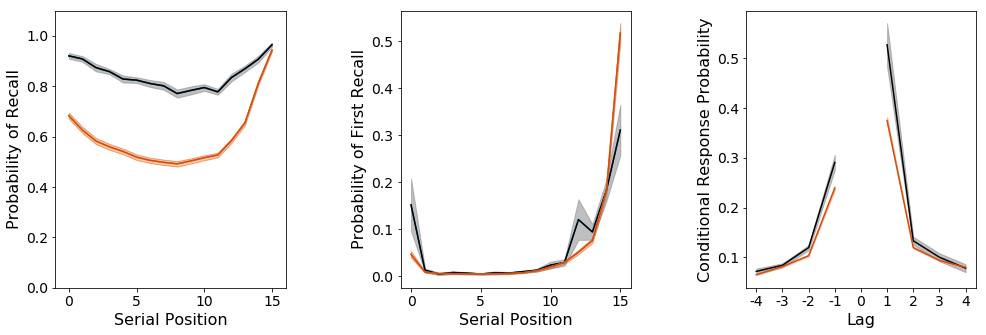

In [29]:
plot_behav(spc_goods, spc_bads,pfr_goods, pfr_bads,crp_goods, crp_bads)

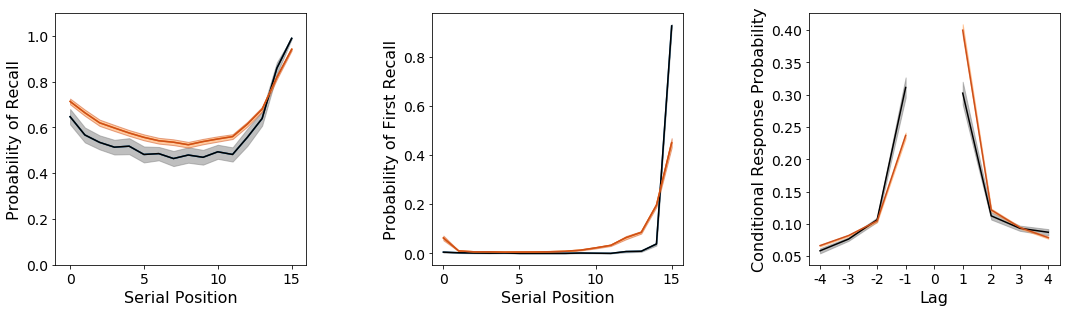

In [20]:
plot_behav(spc_group1, spc_group2,pfr_group1, pfr_group2,crp_group1, crp_group2)

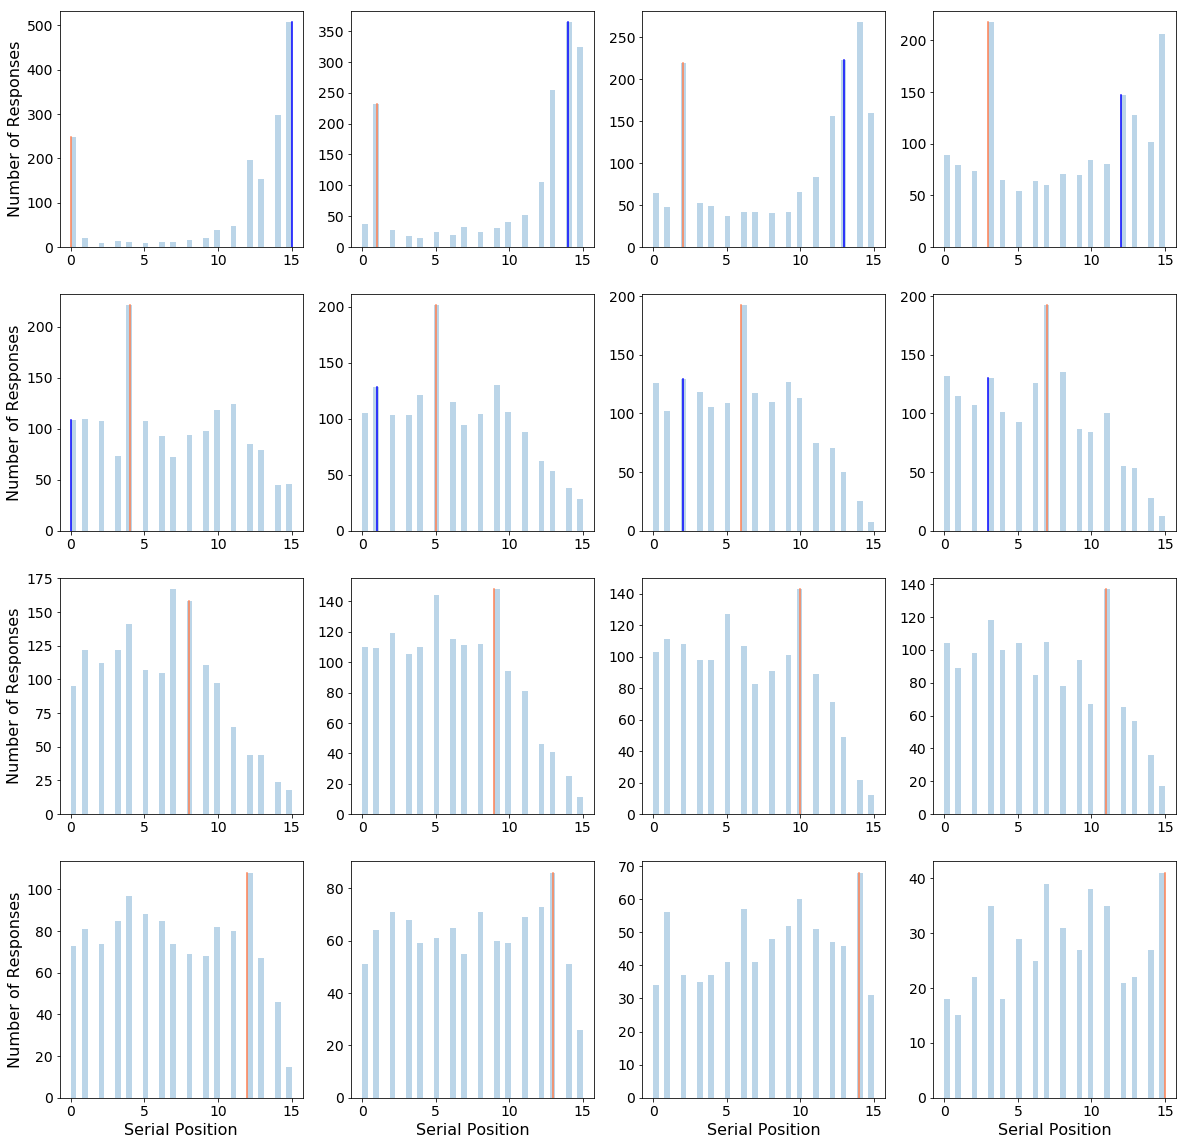

In [9]:
row = 4
column = 4
plt.rcParams['figure.figsize'] = (column*5, row*5)
backwards = [15,14,13,12,0,1,2,3]
for i in range(16):
    plt.subplot(row,column,1+i)
    counts, bin_edges = np.histogram(serial_good[i], bins=LL)
    axes = plt.hist(serial_good[i],histtype='stepfilled', alpha=0.3, bins=40)
    bottom, top = plt.ylim() 
    #plt.axis([0,15,0,500])
    plt.axvline(x=i,color='coral',ymin=0,ymax=counts[i]/top)
    if i < len(backwards):
        plt.axvline(x=backwards[i],color='blue',ymin=0,ymax=counts[backwards[i]]/top)
    if i%4==0:
        plt.ylabel('Number of Responses')
    if i>11:
        plt.xlabel('Serial Position')    
#plt.subplots_adjust(left, bottom, right, top, wspace, hspace)         
#plt.savefig("./Figs/hist_good90.png", format='png')    
plt.show()  

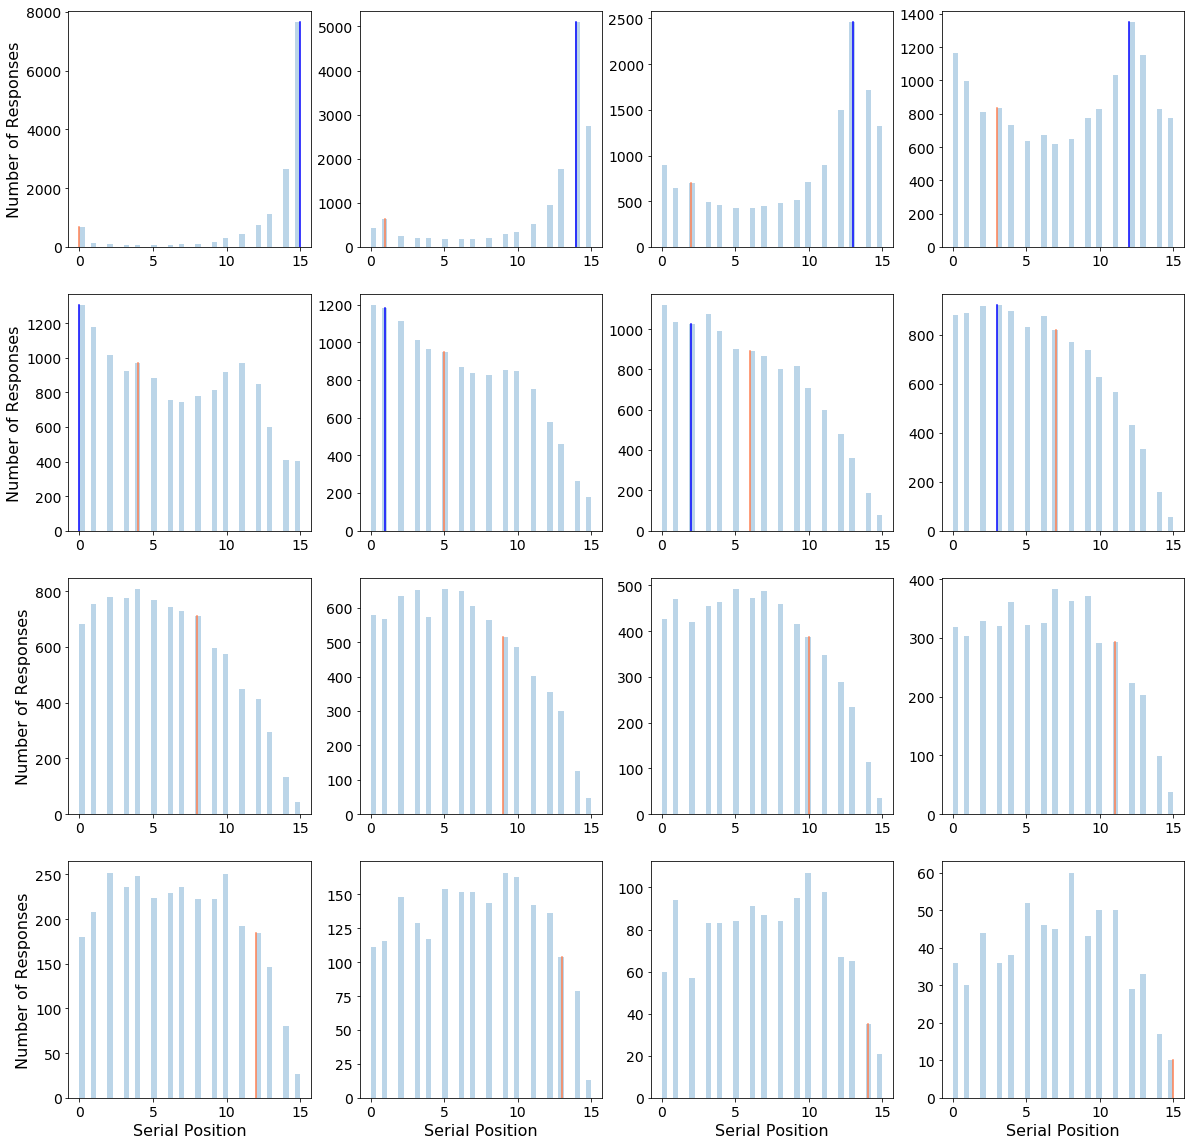

In [15]:
row = 4
column = 4
plt.rcParams['figure.figsize'] = (column*5, row*5)
backwards = [15,14,13,12,0,1,2,3]
for i in range(16):
    plt.subplot(row,column,1+i)
    counts, bin_edges = np.histogram(serial_bad[i], bins=LL)
    axes = plt.hist(serial_bad[i],histtype='stepfilled', alpha=0.3, bins=40)
    bottom, top = plt.ylim() 
    plt.axvline(x=i,color='coral',ymin=0,ymax=counts[i]/top)
    if i < len(backwards):
        plt.axvline(x=backwards[i],color='blue',ymin=0,ymax=counts[backwards[i]]/top)
    if i%4==0:
        plt.ylabel('Number of Responses')
    if i>11:
        plt.xlabel('Serial Position')    
#plt.subplots_adjust(left, bottom, right, top, wspace, hspace)            
#plt.savefig("./Figs/hist_bad90.png", format='png')    
plt.show()   

SpearmanrResult(correlation=0.28728938343427174, pvalue=0.00013903757935649938)


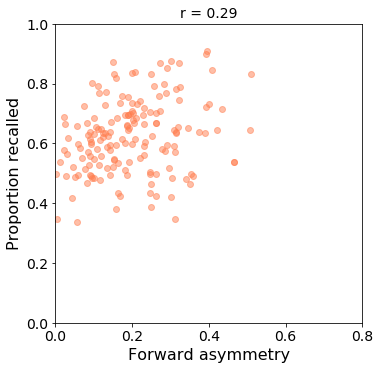

In [31]:
temp = [x/LL for x in accs]
value2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
print(str(spearmanr(value2,accs)))
plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(value2,temp,color='coral',alpha=0.5)
plt.title('r = 0.29')
plt.axis([0,0.8,0,1])
plt.ylabel('Proportion recalled')
plt.xlabel('Forward asymmetry')
#plt.adjust(left, bottom, right, top, wspace, hspace) 
plt.savefig("./Figs/corr_forwardasymmetry.png", format='png')   
#plt.margins(x=0.5, y=0.1)
plt.show()

SpearmanrResult(correlation=-0.80004706026177, pvalue=2.413829965131841e-39)


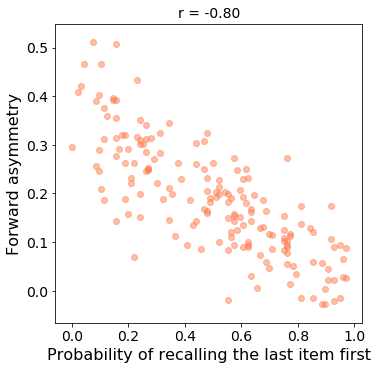

In [28]:
value1 = [x[-1] for x in pfrs]
value2 = [np.sum(x[5:9])-np.sum(x[0:4]) for x in crps]
print(str(spearmanr(value1,value2)))
plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.title('r = -0.80')
#plt.axis([0,10,-0.1,2])
#plt.axis([-0.5,1,0,1.5])
plt.ylabel('Forward asymmetry')
plt.xlabel('Probability of recalling the last item first')
#plt.axvline(x=1,linestyle='--',color='r',alpha=0.8)
#plt.adjust(left, bottom, right, top, wspace, hspace) 
plt.savefig("./Figs/corr_LastrecallAsymmetry.png", format='png')   
#plt.margins(x=0.5, y=0.1)
plt.show()

SpearmanrResult(correlation=0.44229842689685955, pvalue=1.3895362760504811e-09)


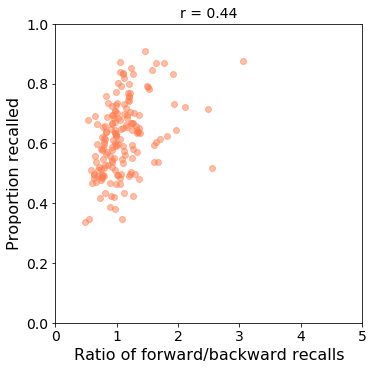

In [16]:
print(str(spearmanr(forward_cnts,accs)))
temp = [x/LL for x in accs]
plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(forward_cnts,temp,color='coral',alpha=0.5)
plt.title('r = 0.44')
plt.axis([0,5,0,1])
plt.ylabel('Proportion recalled')
plt.xlabel('Ratio of forward/backward recalls')
#plt.adjust(left, bottom, right, top, wspace, hspace) 
plt.savefig("./Figs/corr_forwardrecalls.png", format='png')   
#plt.margins(x=0.5, y=0.1)
plt.show()

SpearmanrResult(correlation=-0.8377249831995668, pvalue=2.8916750683959085e-46)


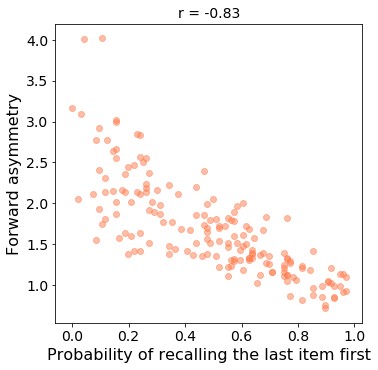

In [17]:
value1 = [x[-1] for x in pfrs]
value2 = [np.mean(x[5])/np.mean(x[3]) for x in crps]
print(str(spearmanr(value1,value2)))

plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(value1,value2,color='coral',alpha=0.5)
plt.title('r = -0.83')
#plt.axis([0,10,-0.1,2])
#plt.axis([-0.5,1,0,1.5])
plt.ylabel('Forward asymmetry')
plt.xlabel('Probability of recalling the last item first')
#plt.axvline(x=1,linestyle='--',color='r',alpha=0.8)
#plt.adjust(left, bottom, right, top, wspace, hspace) 
plt.savefig("./Figs/corr_LastrecallAsymmetry.png", format='png')   
#plt.margins(x=0.5, y=0.1)
plt.show()

In [ ]:
temp = [x/LL for x in accs]
value1 = x[-1] for 
plt.rcParams['figure.figsize'] = (5.5,5.5)
plt.scatter(value,temp,color='coral',alpha=0.7)
plt.title('r = 0.44')
plt.axis([0,5,0,1])
plt.ylabel('Proportion recalled')
plt.xlabel('Ratio of forward/backward recalls')
#plt.adjust(left, bottom, right, top, wspace, hspace) 
plt.savefig("./Figs/corr_forwardrecalls.png", format='png')   
#plt.margins(x=0.5, y=0.1)
plt.show()